In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import io
import glob

In [ ]:
## dataset availabe : https://openneuro.org/datasets/ds004504/versions/1.0.8


all_file=glob.glob("your data link  AD_FTD_HC")

In [3]:
len(all_file)

88

In [4]:
count_sub=1

In [ ]:
Alzheimers_disease_file=[]
frontotemporal_dementia_file=[]
healthy_control_file=[]

In [6]:
for i in range(0,88):
    if count_sub<=36 and i<88:
        Alzheimers_disease_file.append(all_file[i])
        count_sub=count_sub+1
    if (count_sub>=37 and count_sub<=65) and i<88:
        healthy_control_file.append(all_file[i])
        count_sub=count_sub+1
    if (count_sub>=66 and count_sub<=88) and i<88:
        frontotemporal_dementia_file.append(all_file[i])
        count_sub=count_sub+1

In [7]:
print(len(Alzheimers_disease_file),len(frontotemporal_dementia_file),len(healthy_control_file))

36 23 29


In [8]:
def convertset(data):
      data=mne.io.read_raw_eeglab(data,preload=True)
      data.filter(l_freq=5,h_freq=45)
      epochs=mne.make_fixed_length_epochs(data,duration=12,overlap=0)
      return epochs.get_data()

In [9]:
info=mne.io.read_raw_eeglab(Alzheimers_disease_file[0],preload=True).info

<ipython-input-9-a8afe2979053>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  info=mne.io.read_raw_eeglab(Alzheimers_disease_file[0],preload=True).info


In [10]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

In [11]:
%%capture
ad_disease=[]
for idd in Alzheimers_disease_file:
  data=convertset(idd)
  ad_disease.append(data)

In [12]:
%%capture
fd_disease=[]
for idd in frontotemporal_dementia_file:
  data=convertset(idd)
  fd_disease.append(data)

In [13]:
%%capture
healthy_ct=[]
for idd in healthy_control_file:
  data=convertset(idd)
  healthy_ct.append(data)

In [14]:
print(len(ad_disease),len(fd_disease),len(healthy_ct))

36 23 29


In [15]:
ad_epochs_labels=[len(i)*[0] for i in ad_disease]
fd_epochs_labels=[len(i)*[1] for i in fd_disease]
healthy_epochs_labels=[len(i)*[2] for i in healthy_ct]
print(len(ad_epochs_labels),len(fd_epochs_labels),len(healthy_epochs_labels))

36 23 29


In [16]:
data_list=(ad_disease+fd_disease+healthy_ct)
label_list=(ad_epochs_labels+fd_epochs_labels+healthy_epochs_labels)
print(len(data_list),len(label_list))

88 88


In [17]:
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [18]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
print(data_array.shape,label_array.shape,group_array.shape)

(5788, 19, 6000) (5788,) (5788,)


In [19]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_array, label_array, test_size=0.3, random_state=42)

In [21]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1615, 1: 1062, 2: 1374}


## AD,FTD and HC subjects  apply PCSP ( three class ) 10 cross validation

### Random Forest

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00056 (2.2e-16 eps * 19 dim * 1.3e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPI

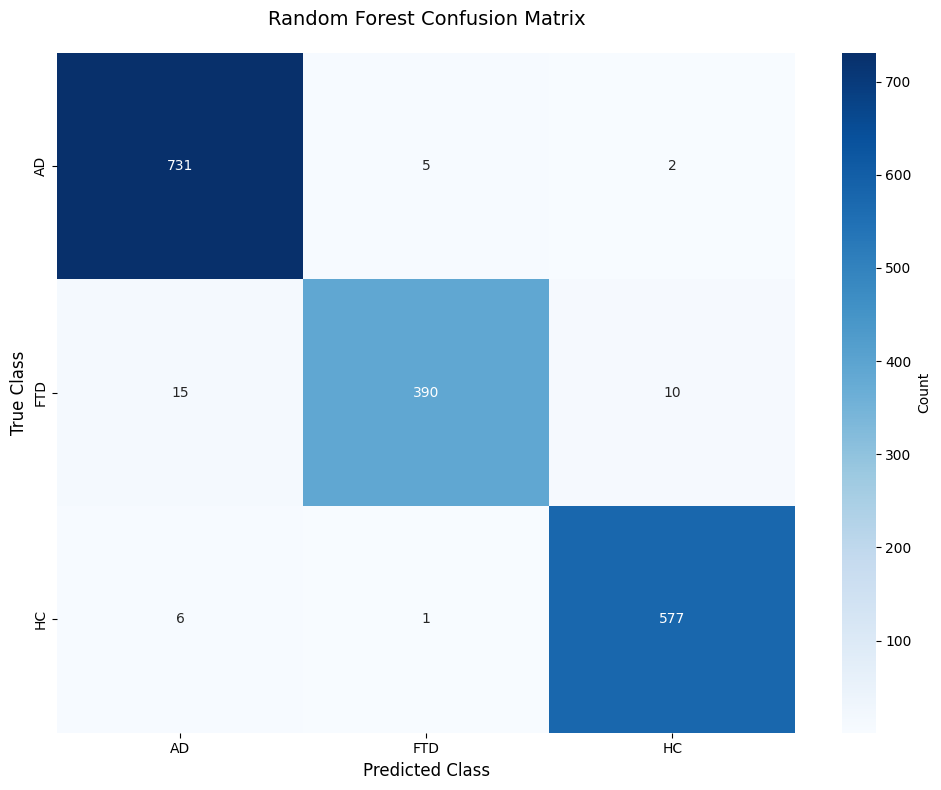


📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.97      0.99      0.98       738
         FTD       0.98      0.94      0.96       415
          HC       0.98      0.99      0.98       584

    accuracy                           0.98      1737
   macro avg       0.98      0.97      0.98      1737
weighted avg       0.98      0.98      0.98      1737


📈 Per-class Accuracy:
  AD: 99.05%
  FTD: 93.98%
  HC: 98.80%

🔁 Pairwise Classifiers Trained:
  AD vs FTD
  AD vs HC
  FTD vs HC

🕒 Total Testing Time: 1.8645 seconds
⏱️ Average Testing Time per Sample: 1.07 ms


In [22]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import time  # For measuring testing time

# Example placeholders for your EEG feature data and labels
# Replace with actual EEG data loading if needed
# X = shape (samples, channels, time_points), y = shape (samples,)
# X, y = your_data_array, your_label_array

# Split dataset (you already have X_train, X_test, y_train, y_test assumed)
# If not already done:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define class names
class_names = ['AD', 'FTD', 'HC']  # Corresponding to classes 0, 1, 2

# CSP and classifier setup for pairwise approach
pairwise_csp_models = {}
pairwise_classifiers = {}
pairs = []
n_classes = 3

# Generate all pairwise combinations of classes
for pair in combinations(range(n_classes), 2):
    pairs.append(pair)
    class1, class2 = pair
    
    # Filter the data for the two classes
    idx = np.logical_or(y_train == class1, y_train == class2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair = (y_pair == class1).astype(int)  # Binary labels: class1=1, class2=0
    
    # Fit CSP and classifier
    csp = CSP(n_components=6, reg=None, log=True, cov_est='concat')
    csp.fit(X_pair, y_pair)
    X_pair_csp = csp.transform(X_pair)
    
    classifier_rf = RFC(random_state=42)  # Added random_state for reproducibility
    classifier_rf.fit(X_pair_csp, y_pair)
    
    # Save models for this pair
    pairwise_csp_models[pair] = csp
    pairwise_classifiers[pair] = classifier_rf

# Predict for test data with timing
start_time = time.time()  # Start timer

y_pred = np.zeros((len(X_test), n_classes))

for pair in pairs:
    class1, class2 = pair
    
    # Filter test data for this pair
    idx = np.logical_or(y_test == class1, y_test == class2)
    X_pair_test = X_test[idx]
    
    # Apply CSP and predict probabilities
    csp = pairwise_csp_models[pair]
    classifier_rf = pairwise_classifiers[pair]
    
    X_pair_csp = csp.transform(X_pair_test)
    prob = classifier_rf.predict_proba(X_pair_csp)
    
    # Assign probabilities to the respective classes
    y_pred[idx, class1] += prob[:, 1]  # Class1 probabilities
    y_pred[idx, class2] += prob[:, 0]  # Class2 probabilities

end_time = time.time()  # End timer
total_test_time = end_time - start_time
avg_test_time_per_sample = total_test_time / len(X_test)

# Final predictions (class with max probability)
final_pred = np.argmax(y_pred, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"\n Multi-Class CSP Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Plot confusion matrix with proper class labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title("Random Forest Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.tight_layout()
plt.show()

# Additional metrics
print("\n📊 Classification Report:")
print(classification_report(y_test, final_pred, target_names=class_names))

# Per-class accuracy
print("\n📈 Per-class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:  # Check if class exists in test set
        class_acc = accuracy_score(y_test[class_mask], final_pred[class_mask])
        print(f"  {class_name}: {class_acc * 100:.2f}%")

# Pairwise classifier summary
print(f"\n🔁 Pairwise Classifiers Trained:")
for pair in pairs:
    class1, class2 = pair
    print(f"  {class_names[class1]} vs {class_names[class2]}")

# Testing time results
print(f"\n🕒 Total Testing Time: {total_test_time:.4f} seconds")
print(f"⏱️ Average Testing Time per Sample: {avg_test_time_per_sample * 1000:.2f} ms")


## Explainable AI (XAI)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import CSP
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from mne import pick_types
from mne.viz import plot_topomap
from mne.channels import make_standard_montage

class ExplainableBCI:
    def __init__(self, pairwise_csp_models, pairwise_classifiers, class_names):
        self.pairwise_csp_models = pairwise_csp_models
        self.pairwise_classifiers = pairwise_classifiers
        self.class_names = class_names
        self.pairs = list(pairwise_csp_models.keys())
    
    def explain_csp_patterns(self, info, pair_idx=0):
        """
        Visualize CSP spatial patterns (topomaps)
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        class1, class2 = pair
        
        # Get CSP patterns (spatial filters)
        patterns = csp_model.patterns_
        filters = csp_model.filters_
        
        # Create figure for patterns
        n_components = patterns.shape[0]
        
        # Dynamic subplot arrangement based on number of components
        if n_components <= 2:
            fig, axes = plt.subplots(1, n_components, figsize=(5*n_components, 4))
            if n_components == 1:
                axes = [axes]  # Make it iterable
        elif n_components <= 4:
            fig, axes = plt.subplots(2, 2, figsize=(10, 8))
            axes = axes.flatten()
        elif n_components <= 6:
            fig, axes = plt.subplots(2, 3, figsize=(15, 8))
            axes = axes.flatten()
        elif n_components <= 8:
            fig, axes = plt.subplots(2, 4, figsize=(20, 8))
            axes = axes.flatten()
        else:
            # For more than 8 components, create a grid that accommodates all
            n_cols = min(4, n_components)
            n_rows = int(np.ceil(n_components / n_cols))
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
            axes = axes.flatten() if n_components > 1 else [axes]
        
        fig.suptitle(f'CSP Spatial Patterns: {self.class_names[class1]} vs {self.class_names[class2]}', 
                     fontsize=14)
        
        # Plot topomaps for each CSP component
        for i in range(n_components):
            ax = axes[i]
            
            # Plot topomap
            im = plot_topomap(patterns[i], info, axes=ax, show=False, 
                             contours=6, cmap='RdBu_r')
            ax.set_title(f'CSP Component {i+1}')
        
        # Hide unused subplots if any
        for j in range(n_components, len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        return patterns, filters
    
    def feature_importance_analysis(self, X_test, y_test, pair_idx=0):
        """
        Analyze feature importance using permutation importance
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        classifier = self.pairwise_classifiers[pair]
        class1, class2 = pair
        
        # Filter test data for this pair
        idx = np.logical_or(y_test == class1, y_test == class2)
        X_pair_test = X_test[idx]
        y_pair_test = y_test[idx]
        y_pair_test = (y_pair_test == class1).astype(int)
        
        # Check if we have data for both classes
        if len(np.unique(y_pair_test)) < 2:
            print(f"Warning: Only one class found in test data for pair {self.class_names[class1]} vs {self.class_names[class2]}")
            return None
        
        # Transform data
        X_csp = csp_model.transform(X_pair_test)
        
        # Calculate permutation importance
        perm_importance = permutation_importance(
            classifier, X_csp, y_pair_test, 
            n_repeats=10, random_state=42, scoring='accuracy'
        )
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        feature_names = [f'CSP Component {i+1}' for i in range(X_csp.shape[1])]
        
        # Sort features by importance
        sorted_idx = perm_importance.importances_mean.argsort()[::-1]
        
        plt.bar(range(len(sorted_idx)), 
                perm_importance.importances_mean[sorted_idx])
        plt.xticks(range(len(sorted_idx)), 
                  [feature_names[i] for i in sorted_idx])
        plt.title(f'Feature Importance: {self.class_names[class1]} vs {self.class_names[class2]}')
        plt.xlabel('CSP Components')
        plt.ylabel('Permutation Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return perm_importance
    
    def shap_analysis(self, X_test, y_test, pair_idx=0, sample_size=100):
        """
        SHAP analysis for model interpretability
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        classifier = self.pairwise_classifiers[pair]
        class1, class2 = pair
        
        # Filter and transform data
        idx = np.logical_or(y_test == class1, y_test == class2)
        X_pair_test = X_test[idx]
        y_pair_test = y_test[idx]
        
        # Check if we have data for both classes
        if len(np.unique(y_pair_test)) < 2:
            print(f"Warning: Only one class found in test data for pair {self.class_names[class1]} vs {self.class_names[class2]}")
            return None, None
        
        X_csp = csp_model.transform(X_pair_test)
        
        # Limit sample size for SHAP (computational efficiency)
        if len(X_csp) > sample_size:
            sample_idx = np.random.choice(len(X_csp), sample_size, replace=False)
            X_csp_sample = X_csp[sample_idx]
        else:
            X_csp_sample = X_csp
        
        try:
            # Create SHAP explainer
            explainer = shap.TreeExplainer(classifier)
            shap_values = explainer.shap_values(X_csp_sample)
            
            # If binary classification, get SHAP values for positive class
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # Positive class
            
            # SHAP summary plot
            feature_names = [f'CSP_{i+1}' for i in range(X_csp_sample.shape[1])]
            
            plt.figure(figsize=(10, 6))
            shap.summary_plot(shap_values, X_csp_sample, 
                             feature_names=feature_names, show=False)
            plt.title(f'SHAP Feature Importance: {self.class_names[class1]} vs {self.class_names[class2]}')
            plt.tight_layout()
            plt.show()
            
            return shap_values, explainer
            
        except Exception as e:
            print(f"Error in SHAP analysis: {e}")
            return None, None
    
    def explain_single_prediction(self, X_sample, info, pair_idx=0):
        """
        Explain a single prediction with spatial and feature-level interpretability
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        classifier = self.pairwise_classifiers[pair]
        class1, class2 = pair
        
        # Transform single sample
        X_csp = csp_model.transform(X_sample.reshape(1, -1, -1))
        
        # Get prediction and probability
        prediction = classifier.predict(X_csp)[0]
        probability = classifier.predict_proba(X_csp)[0]
        
        # Feature contributions (simplified)
        feature_values = X_csp[0]
        
        print(f"Prediction Analysis: {self.class_names[class1]} vs {self.class_names[class2]}")
        print(f"Predicted Class: {self.class_names[class1] if prediction == 1 else self.class_names[class2]}")
        print(f"Confidence: {max(probability):.3f}")
        print(f"Probabilities: {self.class_names[class1]}={probability[1]:.3f}, {self.class_names[class2]}={probability[0]:.3f}")
        
        # Plot CSP feature contributions
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.bar(range(len(feature_values)), feature_values)
        plt.title('CSP Feature Values')
        plt.xlabel('CSP Component')
        plt.ylabel('Feature Value')
        plt.xticks(range(len(feature_values)), [f'CSP_{i+1}' for i in range(len(feature_values))])
        
        plt.subplot(1, 2, 2)
        plt.bar([self.class_names[class2], self.class_names[class1]], probability)
        plt.title('Class Probabilities')
        plt.ylabel('Probability')
        plt.ylim(0, 1)
        
        plt.tight_layout()
        plt.show()
        
        return prediction, probability, feature_values
    
    def generate_explanation_report(self, X_test, y_test, info):
        """
        Generate comprehensive explanation report
        """
        print("=" * 60)
        print("EXPLAINABLE AI ANALYSIS REPORT")
        print("=" * 60)
        
        for i, pair in enumerate(self.pairs):
            class1, class2 = pair
            print(f"\n{i+1}. PAIRWISE ANALYSIS: {self.class_names[class1]} vs {self.class_names[class2]}")
            print("-" * 50)
            
            # Check if we have test data for this pair
            idx = np.logical_or(y_test == class1, y_test == class2)
            if not np.any(idx):
                print(f"   ⚠️  No test data available for this pair")
                continue
            
            # CSP patterns explanation
            print("🧠 CSP Spatial Patterns:")
            print("   - Shows brain regions most discriminative between classes")
            print("   - Red areas: Higher activity for one class")
            print("   - Blue areas: Higher activity for other class")
            
            # Feature importance
            print("\n📊 Feature Importance:")
            importance = self.feature_importance_analysis(X_test, y_test, i)
            if importance is not None:
                top_feature = np.argmax(importance.importances_mean)
                print(f"   - Most important: CSP Component {top_feature + 1}")
                print(f"   - Importance score: {importance.importances_mean[top_feature]:.4f}")
            else:
                print("   - Could not calculate feature importance")
            
            print("\n" + "="*60)

# Usage example
def apply_explainable_ai(pairwise_csp_models, pairwise_classifiers, X_test, y_test, info):
    """
    Main function to apply explainable AI techniques
    """
    class_names = ['AD', 'FTD', 'HC']
    
    # Initialize explainable BCI
    xai_bci = ExplainableBCI(pairwise_csp_models, pairwise_classifiers, class_names)
    
    # Generate comprehensive explanation
    xai_bci.generate_explanation_report(X_test, y_test, info)
    
    # Check if we have pairs to analyze
    if len(xai_bci.pairs) == 0:
        print("No pairwise models found!")
        return xai_bci
    
    # Detailed analysis for first pair
    first_pair = xai_bci.pairs[0]
    class1, class2 = first_pair
    print(f"\nDetailed Analysis for {xai_bci.class_names[class1]} vs {xai_bci.class_names[class2]}:")
    
    try:
        patterns, filters = xai_bci.explain_csp_patterns(info, pair_idx=0)
        importance = xai_bci.feature_importance_analysis(X_test, y_test, pair_idx=0)
        
        # SHAP analysis (if shap is available)
        try:
            shap_values, explainer = xai_bci.shap_analysis(X_test, y_test, pair_idx=0)
            if shap_values is not None:
                print("✅ SHAP analysis completed")
            else:
                print("⚠️  SHAP analysis failed")
        except ImportError:
            print("⚠️  SHAP not available. Install with: pip install shap")
        except Exception as e:
            print(f"⚠️  SHAP analysis error: {e}")
            
    except Exception as e:
        print(f"Error in detailed analysis: {e}")
    
    return xai_bci

EXPLAINABLE AI ANALYSIS REPORT

1. PAIRWISE ANALYSIS: AD vs FTD
--------------------------------------------------
🧠 CSP Spatial Patterns:
   - Shows brain regions most discriminative between classes
   - Red areas: Higher activity for one class
   - Blue areas: Higher activity for other class

📊 Feature Importance:


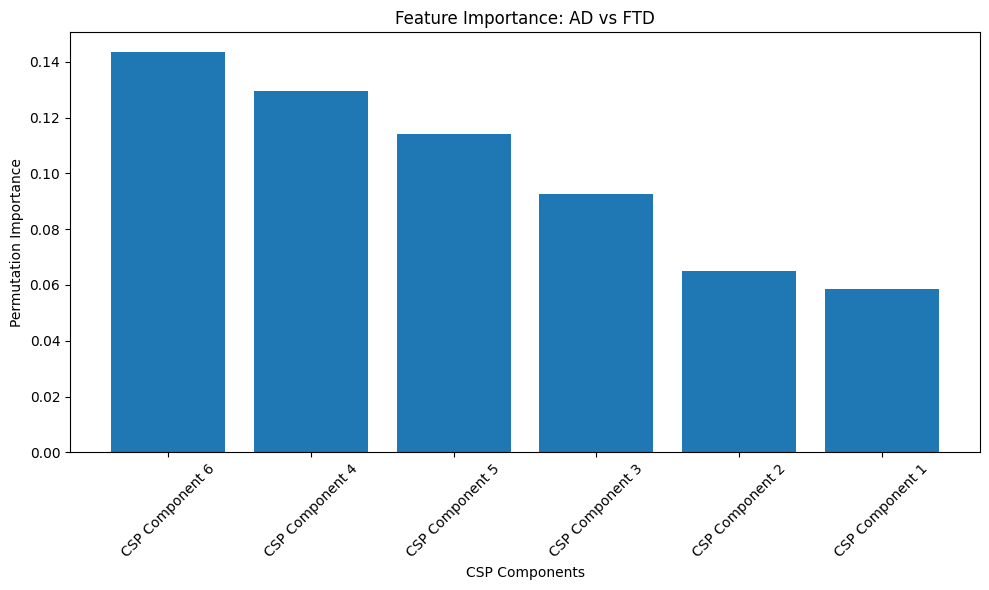

   - Most important: CSP Component 6
   - Importance score: 0.1434


2. PAIRWISE ANALYSIS: AD vs HC
--------------------------------------------------
🧠 CSP Spatial Patterns:
   - Shows brain regions most discriminative between classes
   - Red areas: Higher activity for one class
   - Blue areas: Higher activity for other class

📊 Feature Importance:


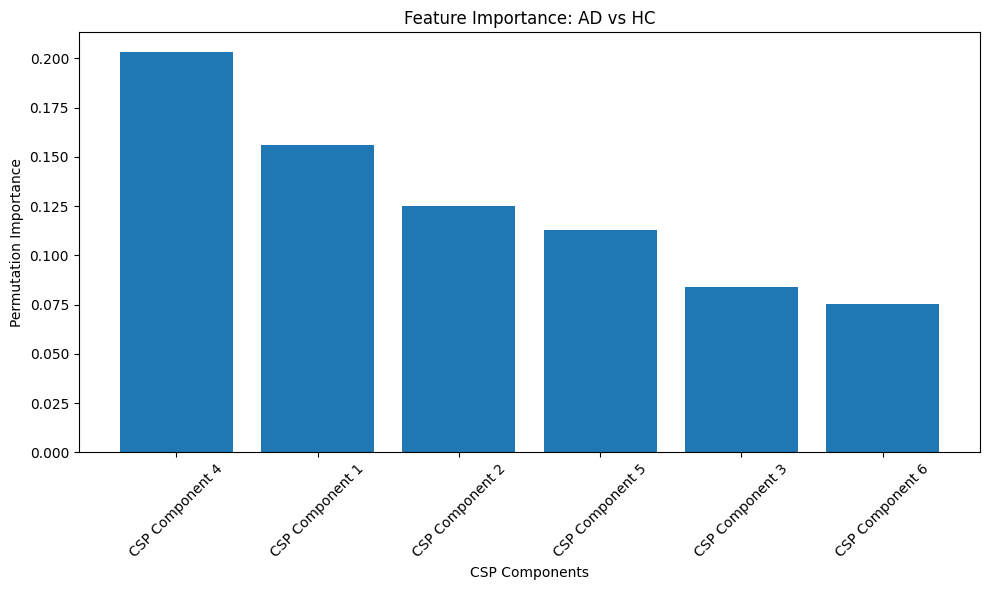

   - Most important: CSP Component 4
   - Importance score: 0.2030


3. PAIRWISE ANALYSIS: FTD vs HC
--------------------------------------------------
🧠 CSP Spatial Patterns:
   - Shows brain regions most discriminative between classes
   - Red areas: Higher activity for one class
   - Blue areas: Higher activity for other class

📊 Feature Importance:


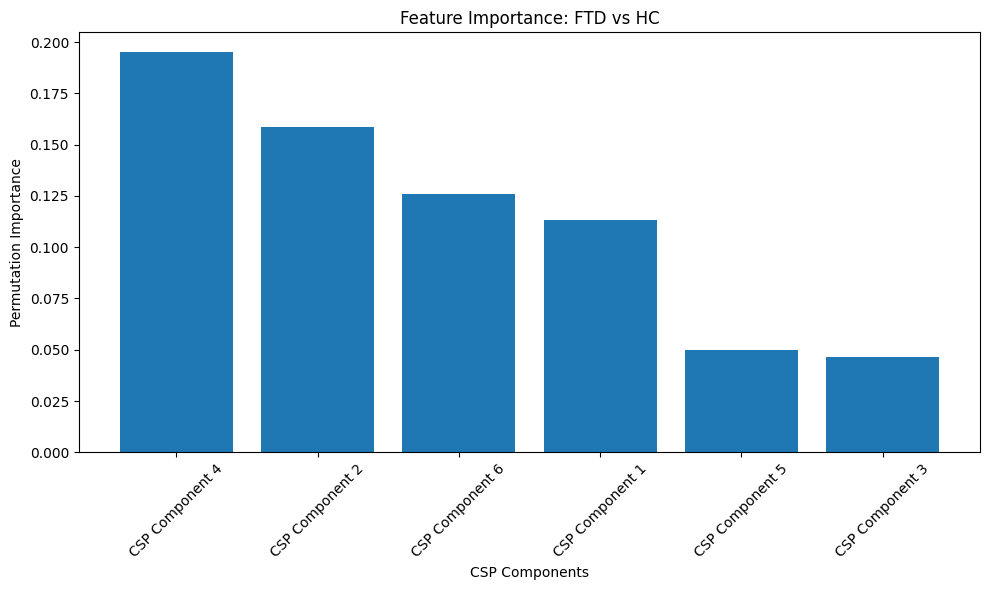

   - Most important: CSP Component 4
   - Importance score: 0.1950


Detailed Analysis for AD vs FTD:


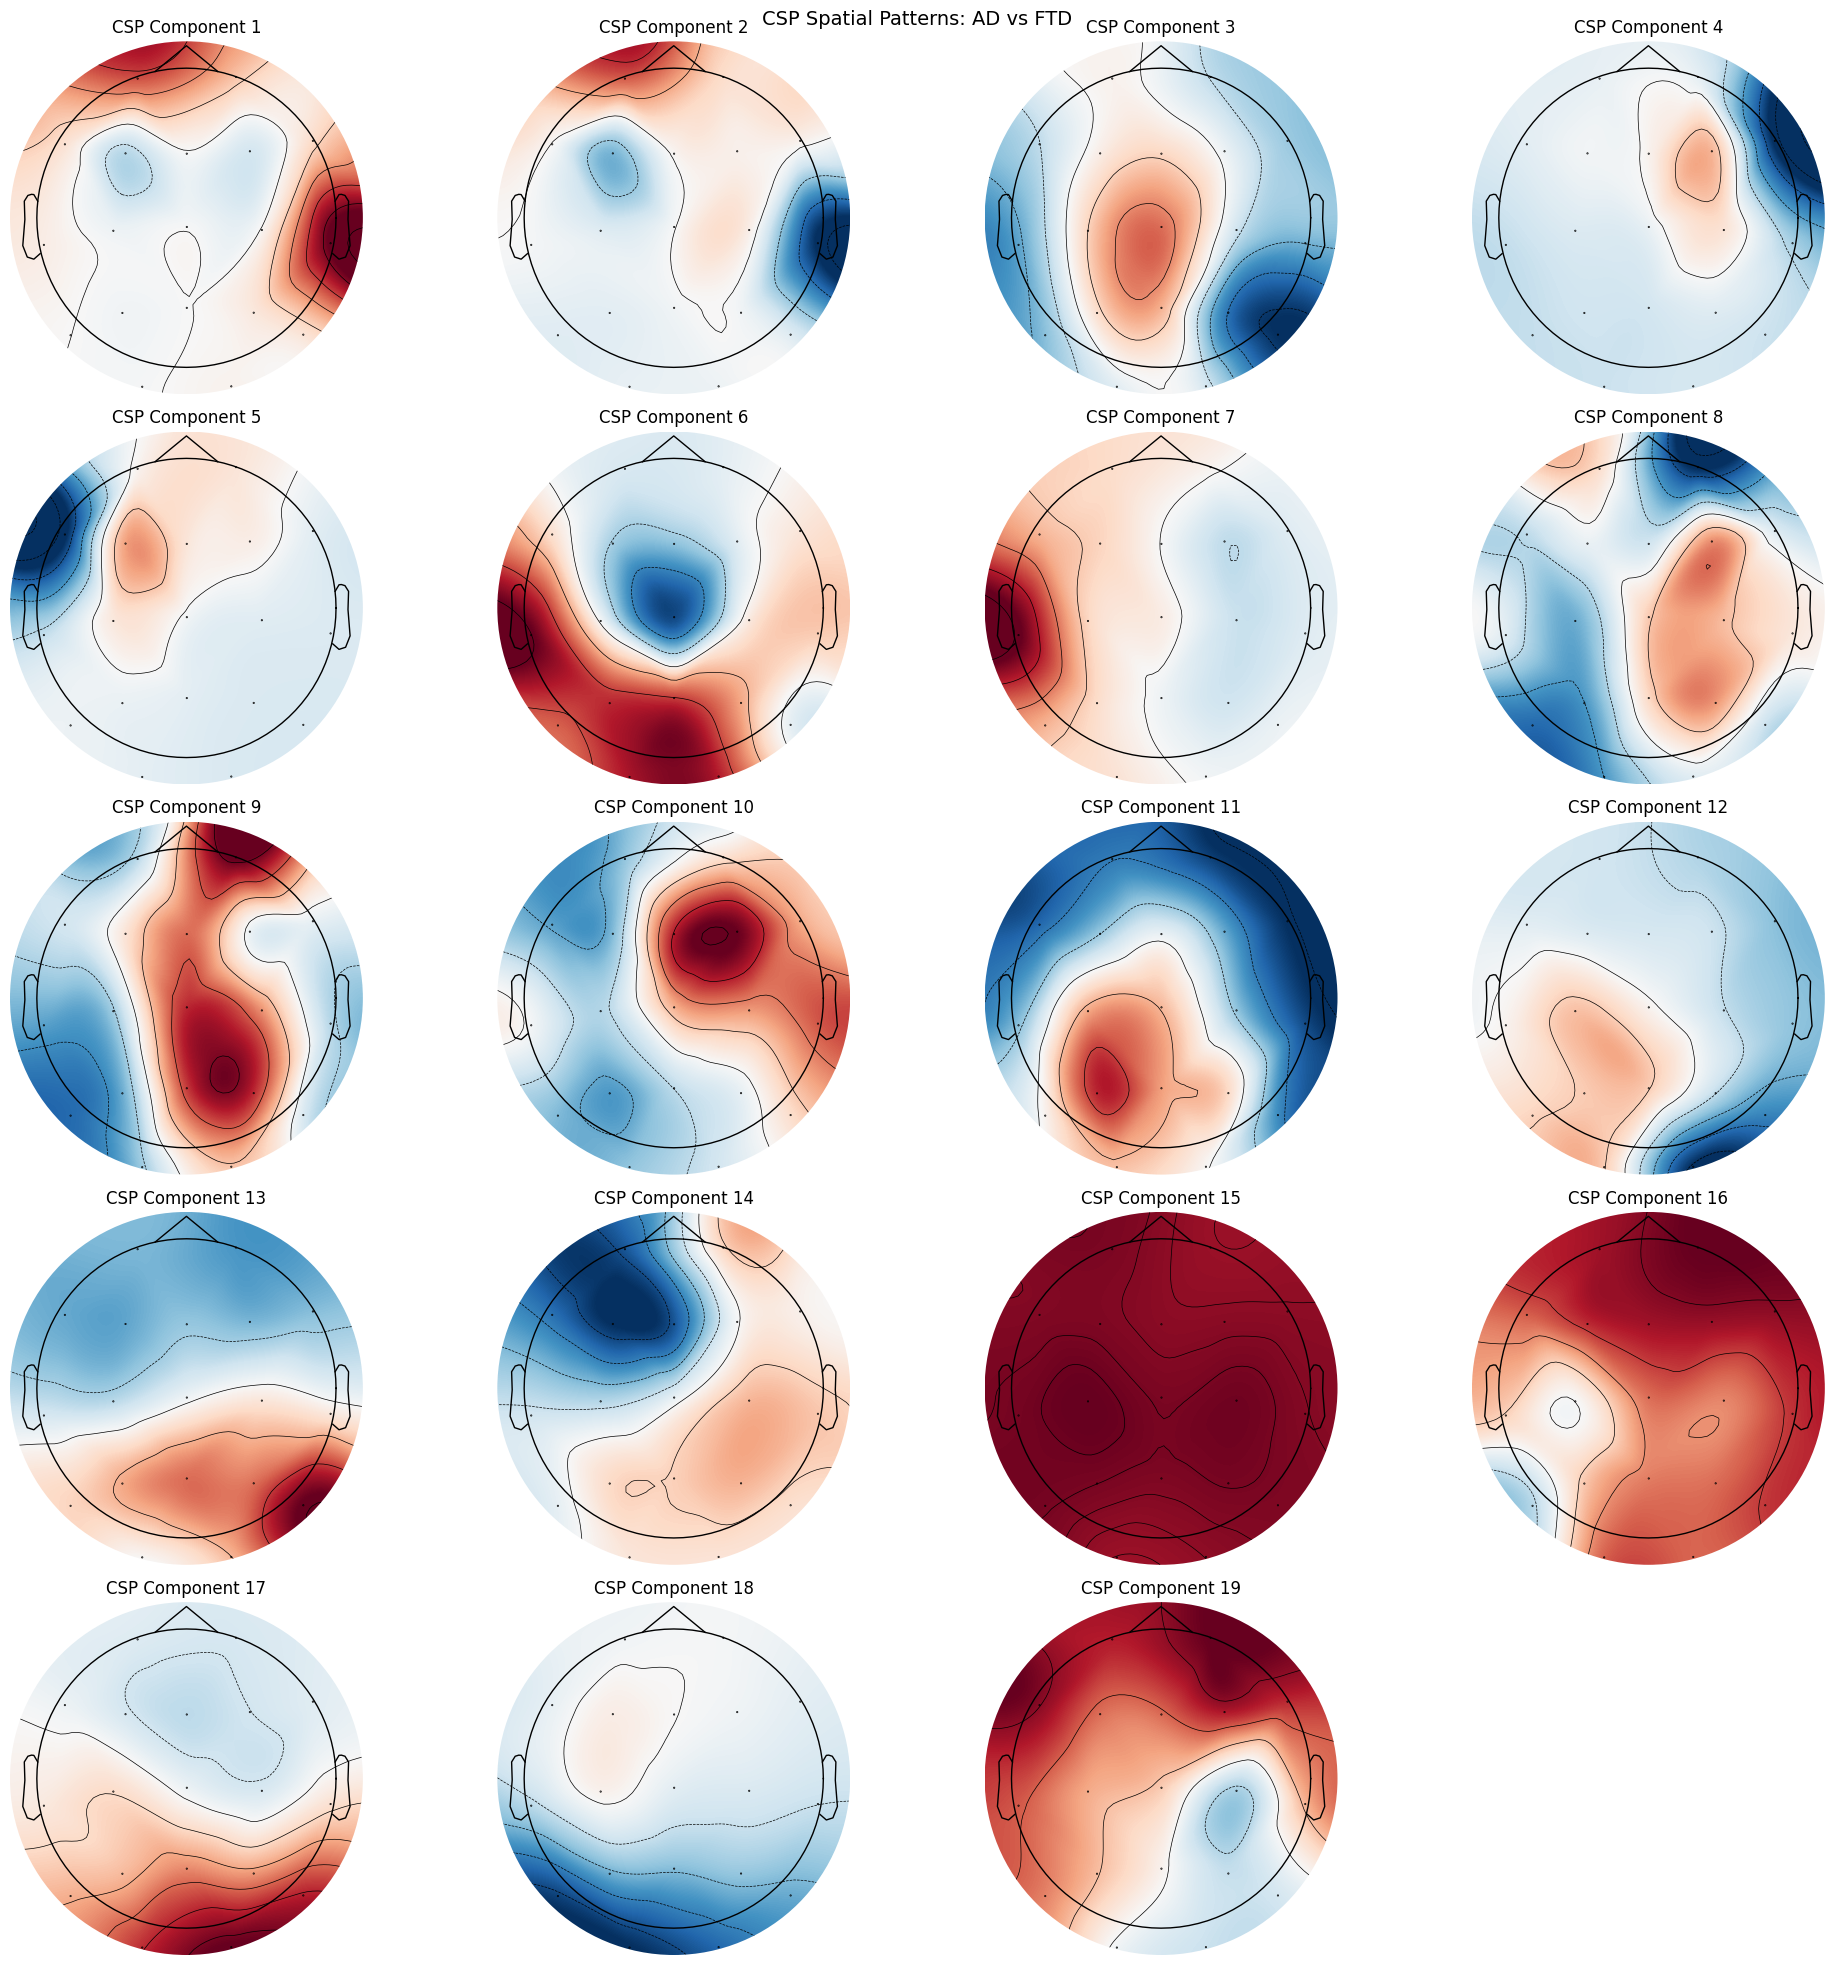

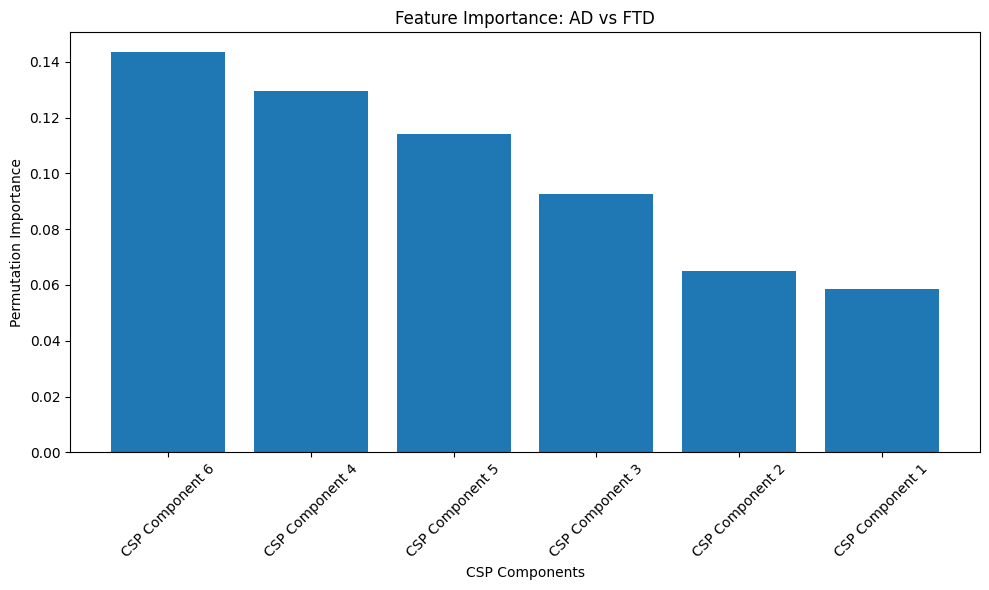

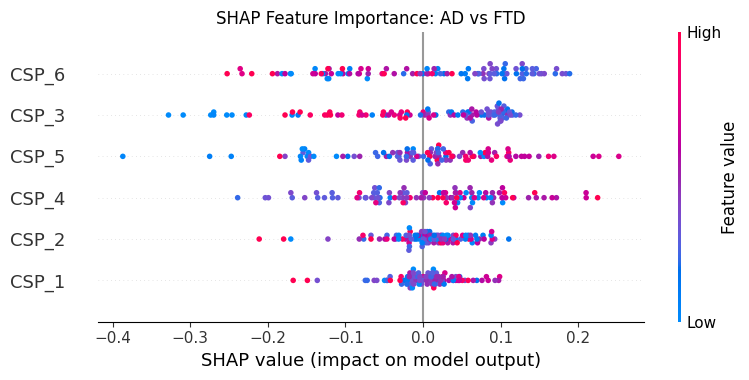

✅ SHAP analysis completed


In [23]:
# Example usage:
xai_bci = apply_explainable_ai(pairwise_csp_models, pairwise_classifiers, X_test, y_test, info)

LIME apply

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00056 (2.2e-16 eps * 19 dim * 1.3e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPI

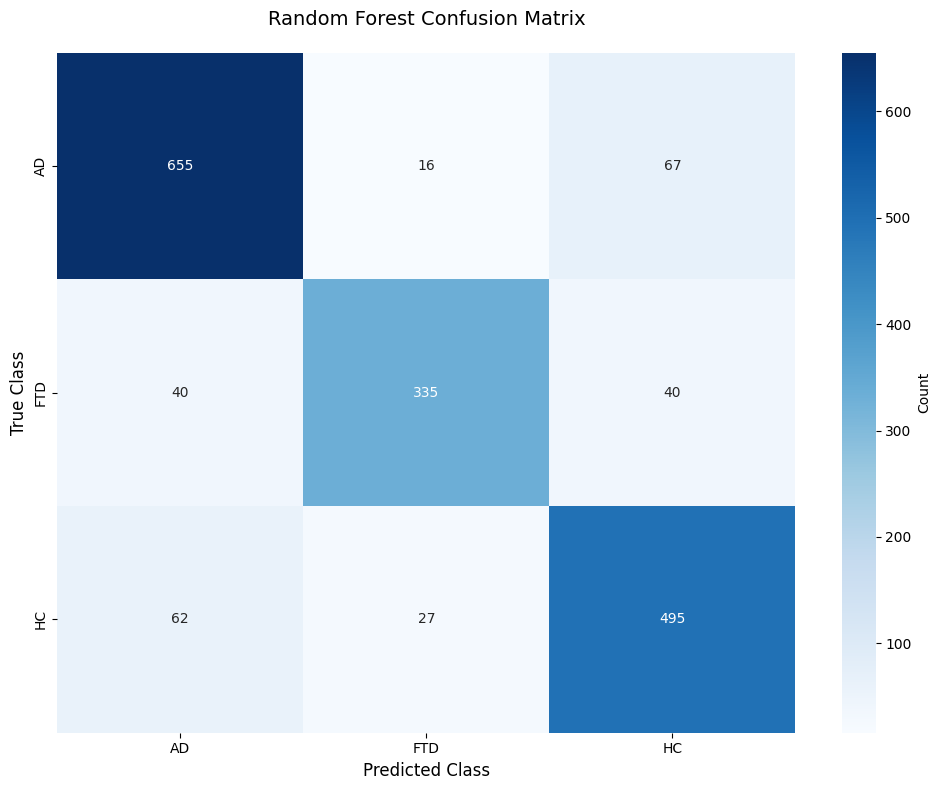


📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.87      0.89      0.88       738
         FTD       0.89      0.81      0.84       415
          HC       0.82      0.85      0.83       584

    accuracy                           0.85      1737
   macro avg       0.86      0.85      0.85      1737
weighted avg       0.86      0.85      0.85      1737


📈 Per-class Accuracy:
  AD: 88.75%
  FTD: 80.72%
  HC: 84.76%

🕒 Total Testing Time: 1.6539 seconds
⏱️ Average Testing Time per Sample: 0.95 ms

🔍 LIME EXPLAINABILITY ANALYSIS

🔬 Generating LIME explanations for 6 test samples...

Analyzing Sample 1:
  True Label: HC
  Predicted Label: HC
  Prediction Confidence: 0.639
  Top contributing features:
    0.00 < EEG_Ch17_T2543 <= 0.00: -0.001
    EEG_Ch0_T1179 <= -0.00: -0.001
    0.00 < EEG_Ch14_T4280 <= 0.00: -0.001
    -0.00 < EEG_Ch17_T5028 <= 0.00: -0.001
    EEG_Ch3_T5070 > 0.00: -0.001
    0.00 < EEG_Ch3_T1828 <= 0.00: -0.001
    EE

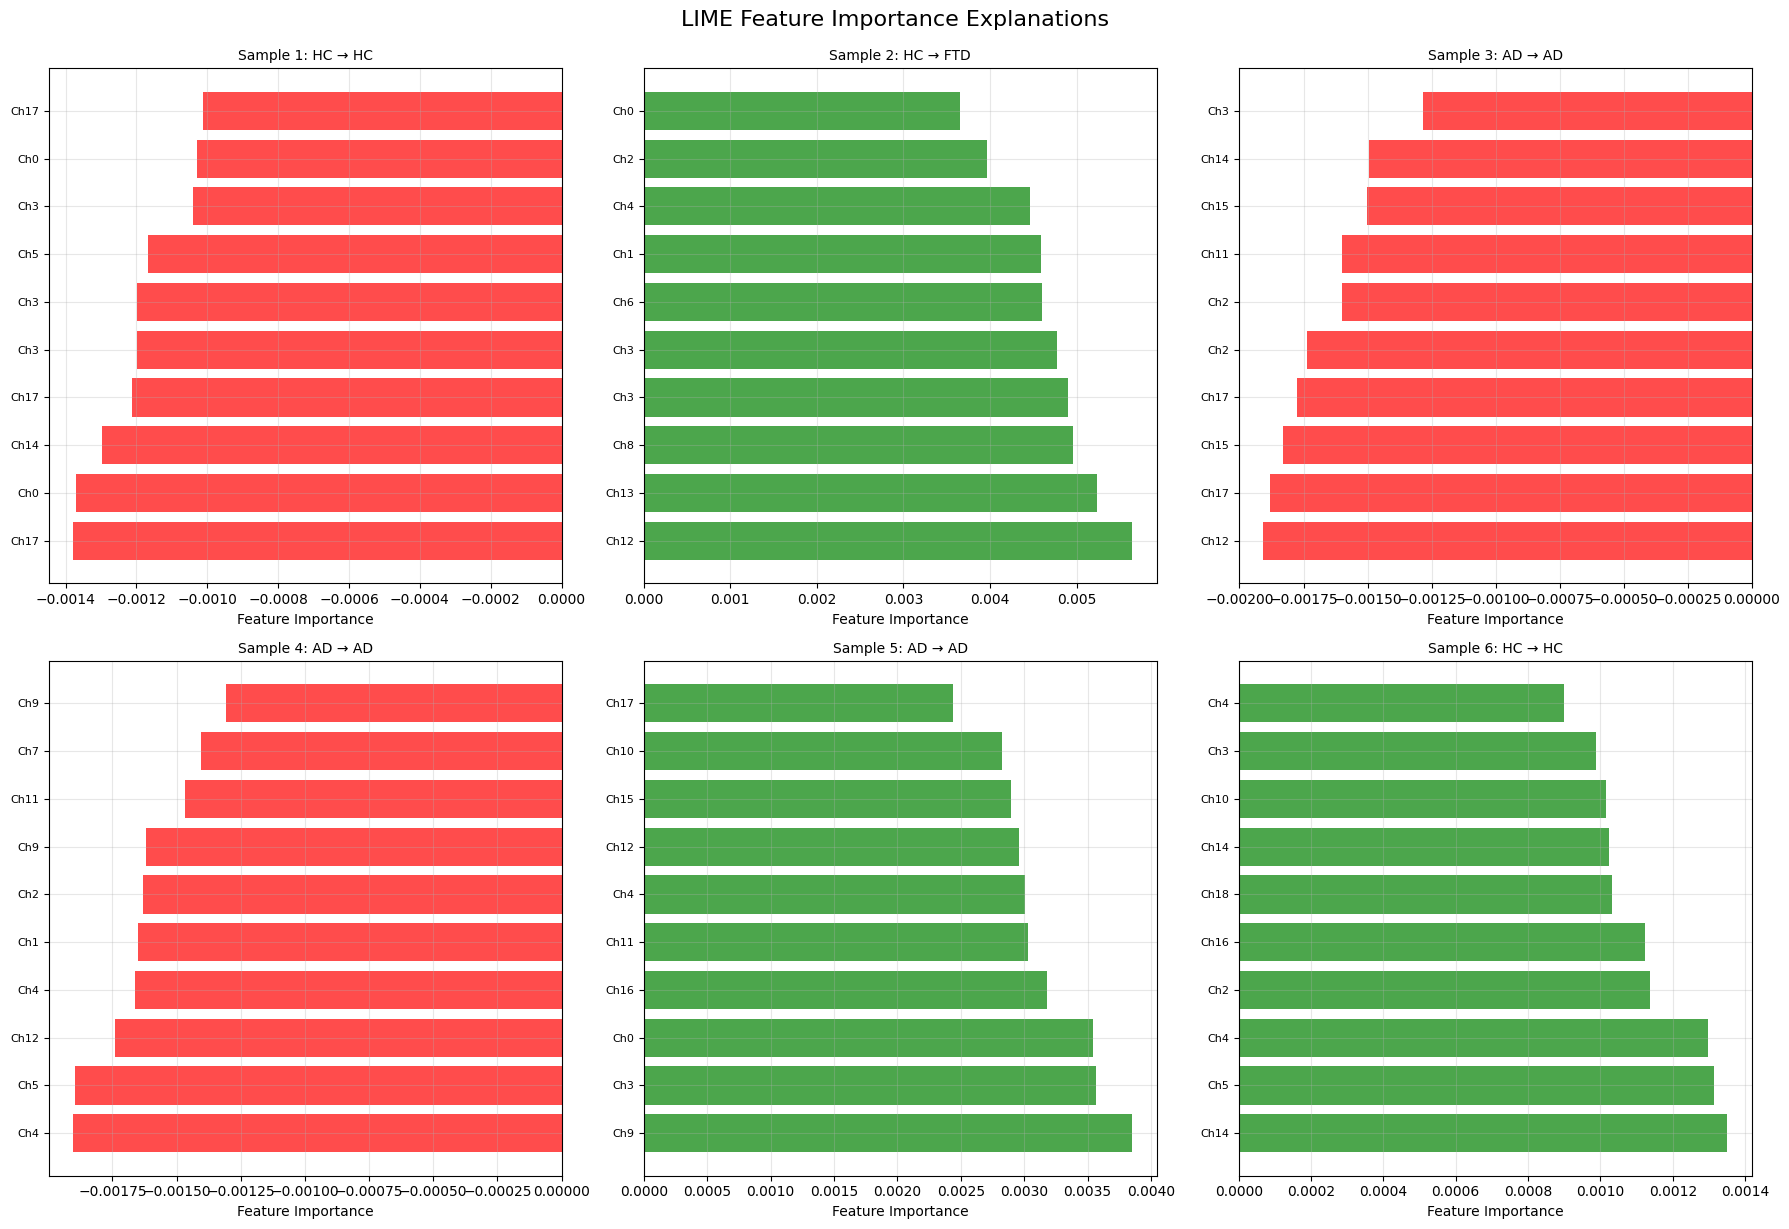


🌍 Global Feature Importance Analysis...

📈 Top 10 Most Important Features Globally:
   1. 0.00 < EEG_Ch12_T1949 <= 0.00: 0.006
   2. -0.00 < EEG_Ch13_T5154 <= 0.00: 0.005
   3. EEG_Ch8_T5272 > 0.00: 0.005
   4. -0.00 < EEG_Ch3_T1860 <= 0.00: 0.005
   5. 0.00 < EEG_Ch3_T114 <= 0.00: 0.005
   6. -0.00 < EEG_Ch6_T3790 <= -0.00: 0.005
   7. EEG_Ch1_T2801 <= -0.00: 0.005
   8. EEG_Ch4_T1255 <= -0.00: 0.004
   9. EEG_Ch2_T4928 > 0.00: 0.004
  10. -0.00 < EEG_Ch9_T414 <= 0.00: 0.004


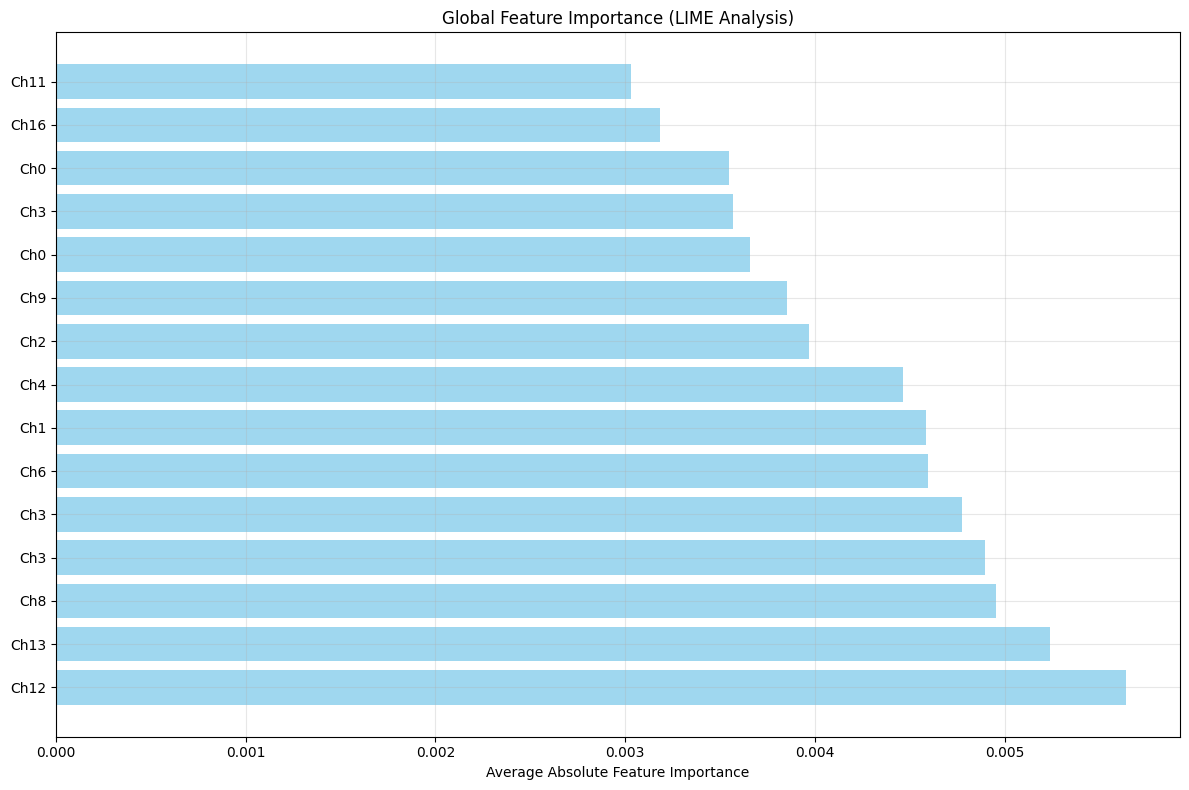


📋 LIME Analysis Summary:
  • Total samples explained: 6
  • Average explanation time: 0.276s per sample
  • Most important feature type: Ch12

🎯 Feature Contribution by Predicted Class:

  AD predictions:
    1. -0.00 < EEG_Ch9_T414 <= 0.00: 0.004 ↑
    2. -0.00 < EEG_Ch3_T706 <= 0.00: 0.004 ↑
    3. EEG_Ch0_T3821 <= -0.00: 0.004 ↑

  FTD predictions:
    1. 0.00 < EEG_Ch12_T1949 <= 0.00: 0.006 ↑
    2. -0.00 < EEG_Ch13_T5154 <= 0.00: 0.005 ↑
    3. EEG_Ch8_T5272 > 0.00: 0.005 ↑

  HC predictions:
    1. 0.00 < EEG_Ch17_T2543 <= 0.00: -0.001 ↓
    2. EEG_Ch0_T1179 <= -0.00: -0.001 ↓
    3. -0.00 < EEG_Ch14_T4289 <= 0.00: 0.001 ↑

✅ LIME explainability analysis completed!
💡 The explanations show which EEG features (channels and time points)
   contribute most to each individual prediction.


In [23]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import time
import lime
import lime.lime_tabular
from collections import defaultdict
import pandas as pd

# Example placeholders for your EEG feature data and labels
# Replace with actual EEG data loading if needed
# X = shape (samples, channels, time_points), y = shape (samples,)
# X, y = your_data_array, your_label_array

# Split dataset (you already have X_train, X_test, y_train, y_test assumed)
# If not already done:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define class names
class_names = ['AD', 'FTD', 'HC']  # Corresponding to classes 0, 1, 2

# CSP and classifier setup for pairwise approach
pairwise_csp_models = {}
pairwise_classifiers = {}
pairs = []
n_classes = 3

# Store CSP features for LIME analysis
all_csp_features_train = []
all_csp_features_test = []

# Generate all pairwise combinations of classes
for pair in combinations(range(n_classes), 2):
    pairs.append(pair)
    class1, class2 = pair
    
    # Filter the data for the two classes
    idx = np.logical_or(y_train == class1, y_train == class2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair = (y_pair == class1).astype(int)  # Binary labels: class1=1, class2=0
    
    # Fit CSP and classifier
    csp = CSP(n_components=6, reg=None, log=True, cov_est='concat')
    csp.fit(X_pair, y_pair)
    X_pair_csp = csp.transform(X_pair)
    
    classifier_rf = RFC(random_state=42)
    classifier_rf.fit(X_pair_csp, y_pair)
    
    # Save models for this pair
    pairwise_csp_models[pair] = csp
    pairwise_classifiers[pair] = classifier_rf
    
    # Store CSP features for this pair
    all_csp_features_train.append(X_pair_csp)

# Create a unified prediction function for LIME
class MultiClassCSPPredictor:
    def __init__(self, pairwise_csp_models, pairwise_classifiers, pairs, n_classes):
        self.pairwise_csp_models = pairwise_csp_models
        self.pairwise_classifiers = pairwise_classifiers
        self.pairs = pairs
        self.n_classes = n_classes
    
    def predict_proba(self, X_raw):
        """Predict probabilities for raw EEG data using pairwise CSP approach"""
        y_pred = np.zeros((len(X_raw), self.n_classes))
        
        for pair in self.pairs:
            class1, class2 = pair
            
            # Apply CSP transformation
            csp = self.pairwise_csp_models[pair]
            classifier_rf = self.pairwise_classifiers[pair]
            
            X_csp = csp.transform(X_raw)
            prob = classifier_rf.predict_proba(X_csp)
            
            # Assign probabilities to the respective classes
            y_pred[:, class1] += prob[:, 1]  # Class1 probabilities
            y_pred[:, class2] += prob[:, 0]  # Class2 probabilities
        
        # Normalize probabilities
        y_pred = y_pred / np.sum(y_pred, axis=1, keepdims=True)
        return y_pred

# Create the unified predictor
unified_predictor = MultiClassCSPPredictor(pairwise_csp_models, pairwise_classifiers, pairs, n_classes)

# Predict for test data with timing
start_time = time.time()
y_pred_proba = unified_predictor.predict_proba(X_test)
final_pred = np.argmax(y_pred_proba, axis=1)
end_time = time.time()

total_test_time = end_time - start_time
avg_test_time_per_sample = total_test_time / len(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"\n Multi-Class CSP Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title("Random Forest Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.tight_layout()
plt.show()

# Additional metrics
print("\n📊 Classification Report:")
print(classification_report(y_test, final_pred, target_names=class_names))

# Per-class accuracy
print("\n📈 Per-class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_acc = accuracy_score(y_test[class_mask], final_pred[class_mask])
        print(f"  {class_name}: {class_acc * 100:.2f}%")

# Testing time results
print(f"\n🕒 Total Testing Time: {total_test_time:.4f} seconds")
print(f"⏱️ Average Testing Time per Sample: {avg_test_time_per_sample * 1000:.2f} ms")

# =============================================================================
# LIME EXPLAINABILITY ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("🔍 LIME EXPLAINABILITY ANALYSIS")
print("="*60)

# Initialize LIME explainer
# Note: We'll create a sample training set for LIME from our training data
sample_indices = np.random.choice(len(X_train), min(1000, len(X_train)), replace=False)
X_train_sample = X_train[sample_indices]

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_sample.reshape(len(X_train_sample), -1),  # Flatten EEG data
    feature_names=[f'EEG_Ch{ch}_T{t}' for ch in range(X_train.shape[1]) for t in range(X_train.shape[2])],
    class_names=class_names,
    mode='classification'
)

def lime_predict_fn(X_flat):
    """Wrapper function for LIME that handles flattened input"""
    X_reshaped = X_flat.reshape(-1, X_train.shape[1], X_train.shape[2])
    return unified_predictor.predict_proba(X_reshaped)

# Analyze a few test samples with LIME
n_samples_to_explain = min(6, len(X_test))
lime_explanations = []

print(f"\n🔬 Generating LIME explanations for {n_samples_to_explain} test samples...")

for i in range(n_samples_to_explain):
    sample_idx = i
    instance = X_test[sample_idx].flatten()
    
    print(f"\nAnalyzing Sample {i+1}:")
    print(f"  True Label: {class_names[y_test[sample_idx]]}")
    print(f"  Predicted Label: {class_names[final_pred[sample_idx]]}")
    print(f"  Prediction Confidence: {np.max(y_pred_proba[sample_idx]):.3f}")
    
    # Generate LIME explanation
    try:
        explanation = explainer.explain_instance(
            instance, 
            lime_predict_fn, 
            num_features=10,  # Top 10 most important features
            num_samples=500   # Number of samples for LIME
        )
        lime_explanations.append(explanation)
        
        # Show explanation
        print(f"  Top contributing features:")
        for feature, importance in explanation.as_list():
            print(f"    {feature}: {importance:.3f}")
            
    except Exception as e:
        print(f"  Error generating explanation: {e}")

# Visualize LIME explanations
if lime_explanations:
    print(f"\n📊 Visualizing LIME explanations...")
    
    # Create figure for LIME visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, explanation in enumerate(lime_explanations[:6]):
        if i < len(axes):
            # Get feature importances
            features = []
            importances = []
            for feature, importance in explanation.as_list():
                features.append(feature.split('_')[1][:8])  # Shortened feature name
                importances.append(importance)
            
            # Plot
            colors = ['red' if imp < 0 else 'green' for imp in importances]
            axes[i].barh(range(len(features)), importances, color=colors, alpha=0.7)
            axes[i].set_yticks(range(len(features)))
            axes[i].set_yticklabels(features, fontsize=8)
            axes[i].set_xlabel('Feature Importance')
            axes[i].set_title(f'Sample {i+1}: {class_names[y_test[i]]} → {class_names[final_pred[i]]}', 
                            fontsize=10)
            axes[i].grid(True, alpha=0.3)
    
    # Hide unused subplots
    for i in range(len(lime_explanations), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('LIME Feature Importance Explanations', fontsize=16, y=1.02)
    plt.show()

# Global feature importance analysis
print(f"\n🌍 Global Feature Importance Analysis...")

# Collect all feature importances across explanations
all_feature_importances = defaultdict(list)
for explanation in lime_explanations:
    for feature, importance in explanation.as_list():
        all_feature_importances[feature].append(abs(importance))

# Calculate average importance for each feature
avg_importances = {}
for feature, importances in all_feature_importances.items():
    avg_importances[feature] = np.mean(importances)

# Sort by importance
sorted_features = sorted(avg_importances.items(), key=lambda x: x[1], reverse=True)

print(f"\n📈 Top 10 Most Important Features Globally:")
for i, (feature, importance) in enumerate(sorted_features[:10]):
    print(f"  {i+1:2d}. {feature}: {importance:.3f}")

# Visualize global feature importance
if sorted_features:
    plt.figure(figsize=(12, 8))
    features = [f[0].split('_')[1][:10] for f in sorted_features[:15]]  # Top 15 features
    importances = [f[1] for f in sorted_features[:15]]
    
    plt.barh(range(len(features)), importances, color='skyblue', alpha=0.8)
    plt.yticks(range(len(features)), features)
    plt.xlabel('Average Absolute Feature Importance')
    plt.title('Global Feature Importance (LIME Analysis)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Summary statistics
print(f"\n📋 LIME Analysis Summary:")
print(f"  • Total samples explained: {len(lime_explanations)}")
print(f"  • Average explanation time: {total_test_time/n_samples_to_explain:.3f}s per sample")
print(f"  • Most important feature type: {sorted_features[0][0].split('_')[1] if sorted_features else 'N/A'}")

# Feature contribution by class
print(f"\n🎯 Feature Contribution by Predicted Class:")
class_feature_contributions = defaultdict(lambda: defaultdict(list))

for i, explanation in enumerate(lime_explanations):
    predicted_class = final_pred[i]
    for feature, importance in explanation.as_list():
        class_feature_contributions[predicted_class][feature].append(importance)

for class_idx in range(n_classes):
    if class_idx in class_feature_contributions:
        print(f"\n  {class_names[class_idx]} predictions:")
        class_features = class_feature_contributions[class_idx]
        
        # Average importance per feature for this class
        avg_class_importance = {}
        for feature, importances in class_features.items():
            avg_class_importance[feature] = np.mean(importances)
        
        # Top 3 features for this class
        sorted_class_features = sorted(avg_class_importance.items(), 
                                     key=lambda x: abs(x[1]), reverse=True)
        
        for j, (feature, importance) in enumerate(sorted_class_features[:3]):
            direction = "↑" if importance > 0 else "↓"
            print(f"    {j+1}. {feature}: {importance:.3f} {direction}")

print(f"\n✅ LIME explainability analysis completed!")
print(f"💡 The explanations show which EEG features (channels and time points)")
print(f"   contribute most to each individual prediction.")

## Logistic Regression 

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00056 (2.2e-16 eps * 19 dim * 1.3e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPI

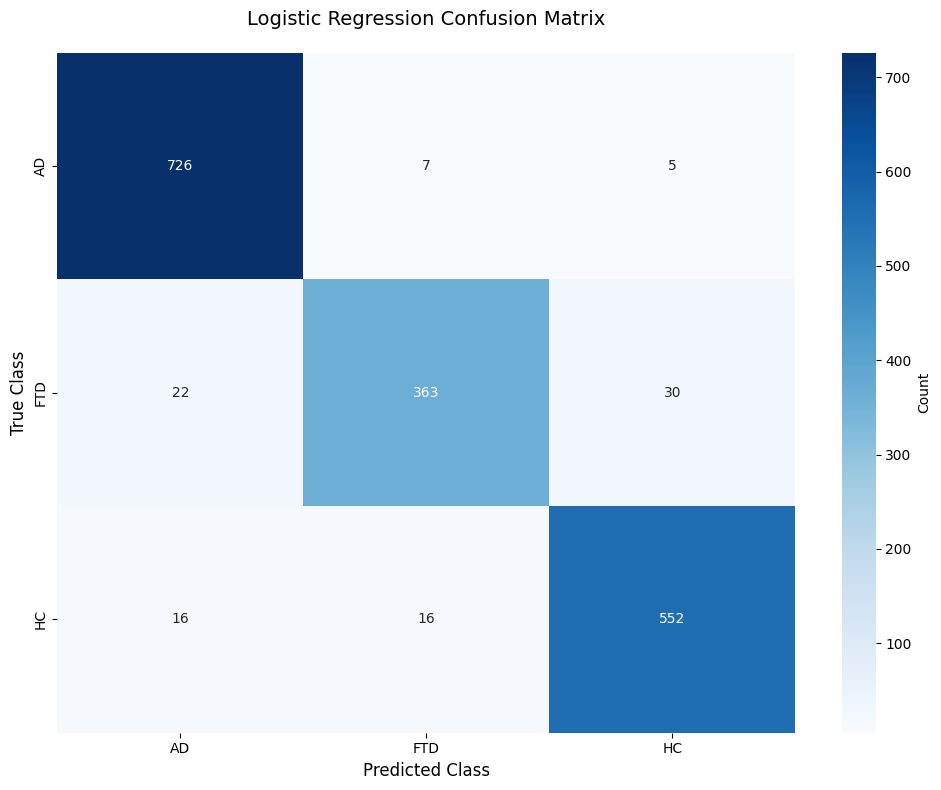


📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.95      0.98      0.97       738
         FTD       0.94      0.87      0.91       415
          HC       0.94      0.95      0.94       584

    accuracy                           0.94      1737
   macro avg       0.94      0.93      0.94      1737
weighted avg       0.94      0.94      0.94      1737


📈 Per-class Accuracy:
  AD: 98.37%
  FTD: 87.47%
  HC: 94.52%

🔁 Pairwise Classifiers Trained:
  AD vs FTD
  AD vs HC
  FTD vs HC

🕒 Total Testing Time: 1.9301 seconds
⏱️ Average Testing Time per Sample: 1.11 ms


In [23]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import time  # For measuring testing time

# Define class names
class_names = ['AD', 'FTD', 'HC']  # Corresponding to classes 0, 1, 2

# CSP and classifier setup for pairwise approach
pairwise_csp_models = {}
pairwise_classifiers = {}
pairs = []
n_classes = 3

# Generate all pairwise combinations of classes
for pair in combinations(range(n_classes), 2):
    pairs.append(pair)
    class1, class2 = pair
    
    # Filter the data for the two classes
    idx = np.logical_or(y_train == class1, y_train == class2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair = (y_pair == class1).astype(int)  # Binary labels: class1=1, class2=0
    
    # Fit CSP and classifier
    csp = CSP(n_components=6, reg=None, log=True, cov_est='concat')
    csp.fit(X_pair, y_pair)
    X_pair_csp = csp.transform(X_pair)
    
    classifier_lr = LogisticRegression(random_state=42, max_iter=1000)
    classifier_lr.fit(X_pair_csp, y_pair)
    
    # Save models
    pairwise_csp_models[pair] = csp
    pairwise_classifiers[pair] = classifier_lr

# Start testing time
start_time = time.time()

# Predict for test data
y_pred = np.zeros((len(X_test), n_classes))

for pair in pairs:
    class1, class2 = pair
    
    # Filter test data for this pair
    idx = np.logical_or(y_test == class1, y_test == class2)
    X_pair_test = X_test[idx]
    
    # Apply CSP and predict probabilities
    csp = pairwise_csp_models[pair]
    classifier_lr = pairwise_classifiers[pair]
    
    X_pair_csp = csp.transform(X_pair_test)
    prob = classifier_lr.predict_proba(X_pair_csp)
    
    # Assign probabilities to the respective classes
    y_pred[idx, class1] += prob[:, 1]  # Class1 probabilities
    y_pred[idx, class2] += prob[:, 0]  # Class2 probabilities

# End testing time
end_time = time.time()
total_test_time = end_time - start_time
avg_test_time_per_sample = total_test_time / len(X_test)

# Final predictions
final_pred = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"\n✅ Multi-Class CSP Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title("Logistic Regression Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, final_pred, target_names=class_names))

# Per-class accuracy
print("\n📈 Per-class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_acc = accuracy_score(y_test[class_mask], final_pred[class_mask])
        print(f"  {class_name}: {class_acc * 100:.2f}%")

# Pairwise classifier info
print(f"\n🔁 Pairwise Classifiers Trained:")
for pair in pairs:
    class1, class2 = pair
    print(f"  {class_names[class1]} vs {class_names[class2]}")

# Inference time
print(f"\n🕒 Total Testing Time: {total_test_time:.4f} seconds")
print(f"⏱️ Average Testing Time per Sample: {avg_test_time_per_sample * 1000:.2f} ms")


## Support Vector Machine

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00056 (2.2e-16 eps * 19 dim * 1.3e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPI

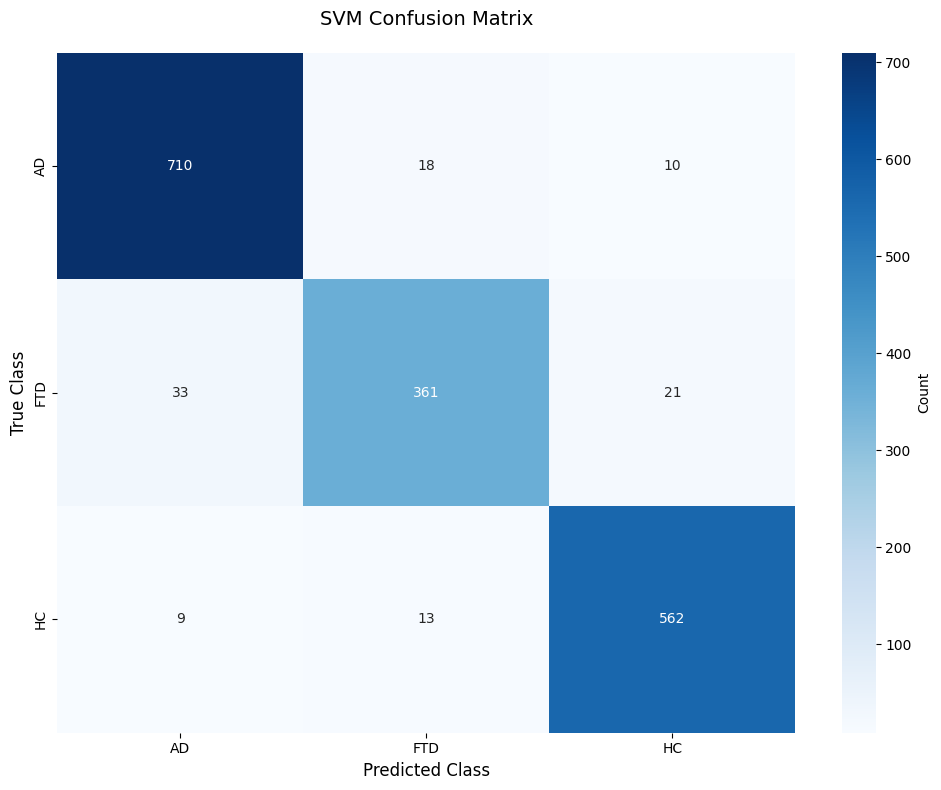


📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.94      0.96      0.95       738
         FTD       0.92      0.87      0.89       415
          HC       0.95      0.96      0.95       584

    accuracy                           0.94      1737
   macro avg       0.94      0.93      0.93      1737
weighted avg       0.94      0.94      0.94      1737


📈 Per-class Accuracy:
  AD: 96.21%
  FTD: 86.99%
  HC: 96.23%

🔁 Pairwise Classifiers Trained (SVM):
  AD vs FTD
  AD vs HC
  FTD vs HC

🕒 Total Testing Time: 2.2564 seconds
⏱️ Average Testing Time per Sample: 1.30 ms


In [24]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import time  # For measuring testing time

# Define class names
class_names = ['AD', 'FTD', 'HC']  # Corresponding to classes 0, 1, 2

# CSP and classifier setup for pairwise approach
pairwise_csp_models = {}
pairwise_classifiers = {}
pairs = []
n_classes = 3

# Generate all pairwise combinations of classes
for pair in combinations(range(n_classes), 2):
    pairs.append(pair)
    class1, class2 = pair
    
    # Filter the data for the two classes
    idx = np.logical_or(y_train == class1, y_train == class2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair = (y_pair == class1).astype(int)  # Binary labels: class1=1, class2=0
    
    # Fit CSP and classifier
    csp = CSP(n_components=6, reg=None, log=True, cov_est='concat')
    csp.fit(X_pair, y_pair)
    X_pair_csp = csp.transform(X_pair)
    
    classifier_svm = SVC(probability=True, kernel='rbf', random_state=42)
    classifier_svm.fit(X_pair_csp, y_pair)
    
    # Save models
    pairwise_csp_models[pair] = csp
    pairwise_classifiers[pair] = classifier_svm

# Start testing time
start_time = time.time()

# Predict for test data
y_pred = np.zeros((len(X_test), n_classes))

for pair in pairs:
    class1, class2 = pair
    
    # Filter test data for this pair
    idx = np.logical_or(y_test == class1, y_test == class2)
    X_pair_test = X_test[idx]
    
    # Apply CSP and predict probabilities
    csp = pairwise_csp_models[pair]
    classifier_svm = pairwise_classifiers[pair]
    
    X_pair_csp = csp.transform(X_pair_test)
    prob = classifier_svm.predict_proba(X_pair_csp)
    
    # Assign probabilities to the respective classes
    y_pred[idx, class1] += prob[:, 1]  # Class1 probabilities
    y_pred[idx, class2] += prob[:, 0]  # Class2 probabilities

# End testing time
end_time = time.time()
total_test_time = end_time - start_time
avg_test_time_per_sample = total_test_time / len(X_test)

# Final predictions
final_pred = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"\n✅ Multi-Class CSP Accuracy (SVM): {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title("SVM Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, final_pred, target_names=class_names))

# Per-class accuracy
print("\n📈 Per-class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_acc = accuracy_score(y_test[class_mask], final_pred[class_mask])
        print(f"  {class_name}: {class_acc * 100:.2f}%")

# Pairwise classifier info
print(f"\n🔁 Pairwise Classifiers Trained (SVM):")
for pair in pairs:
    class1, class2 = pair
    print(f"  {class_names[class1]} vs {class_names[class2]}")

# Inference time
print(f"\n🕒 Total Testing Time: {total_test_time:.4f} seconds")
print(f"⏱️ Average Testing Time per Sample: {avg_test_time_per_sample * 1000:.2f} ms")


## KNN apply 

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00056 (2.2e-16 eps * 19 dim * 1.3e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPI

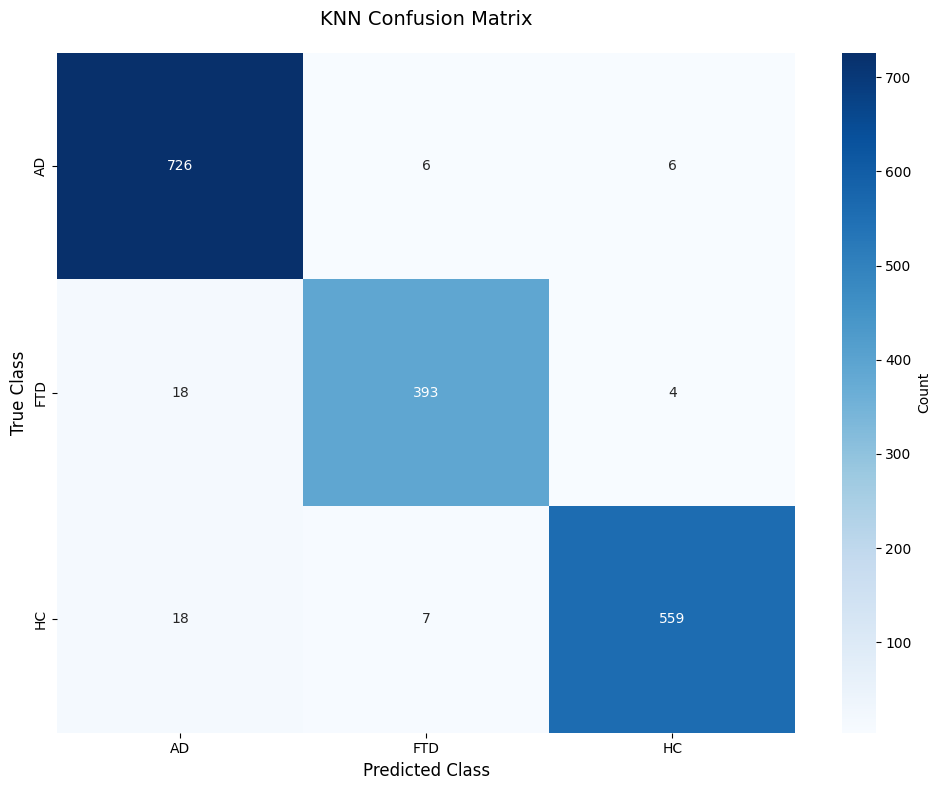


📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.95      0.98      0.97       738
         FTD       0.97      0.95      0.96       415
          HC       0.98      0.96      0.97       584

    accuracy                           0.97      1737
   macro avg       0.97      0.96      0.97      1737
weighted avg       0.97      0.97      0.97      1737


📈 Per-class Accuracy:
  AD: 98.37%
  FTD: 94.70%
  HC: 95.72%

🔁 Pairwise Classifiers Trained (KNN):
  AD vs FTD
  AD vs HC
  FTD vs HC

🕒 Total Testing Time: 1.9790 seconds
⏱️ Average Testing Time per Sample: 1.14 ms


In [25]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import time  # For measuring testing time

# Define class names
class_names = ['AD', 'FTD', 'HC']  # Corresponding to classes 0, 1, 2

# CSP and classifier setup for pairwise approach
pairwise_csp_models = {}
pairwise_classifiers = {}
pairs = []
n_classes = 3

# Generate all pairwise combinations of classes
for pair in combinations(range(n_classes), 2):
    pairs.append(pair)
    class1, class2 = pair

    # Filter the data for the two classes
    idx = np.logical_or(y_train == class1, y_train == class2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair = (y_pair == class1).astype(int)  # Binary labels: class1=1, class2=0

    # Fit CSP and classifier
    csp = CSP(n_components=6, reg=None, log=True, cov_est='concat')
    csp.fit(X_pair, y_pair)
    X_pair_csp = csp.transform(X_pair)

    classifier_knn = KNeighborsClassifier(n_neighbors=5)
    classifier_knn.fit(X_pair_csp, y_pair)

    # Save models
    pairwise_csp_models[pair] = csp
    pairwise_classifiers[pair] = classifier_knn

# Start testing time
start_time = time.time()

# Predict for test data
y_pred = np.zeros((len(X_test), n_classes))

for pair in pairs:
    class1, class2 = pair

    # Filter test data for this pair
    idx = np.logical_or(y_test == class1, y_test == class2)
    X_pair_test = X_test[idx]

    # Apply CSP and predict probabilities
    csp = pairwise_csp_models[pair]
    classifier_knn = pairwise_classifiers[pair]

    X_pair_csp = csp.transform(X_pair_test)
    prob = classifier_knn.predict_proba(X_pair_csp)

    # Assign probabilities to the respective classes
    y_pred[idx, class1] += prob[:, 1]  # Class1 probabilities
    y_pred[idx, class2] += prob[:, 0]  # Class2 probabilities

# End testing time
end_time = time.time()
total_test_time = end_time - start_time
avg_test_time_per_sample = total_test_time / len(X_test)

# Final predictions
final_pred = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"\n✅ Multi-Class CSP Accuracy (KNN): {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title("KNN Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, final_pred, target_names=class_names))

# Per-class accuracy
print("\n📈 Per-class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_acc = accuracy_score(y_test[class_mask], final_pred[class_mask])
        print(f"  {class_name}: {class_acc * 100:.2f}%")

# Pairwise classifier info
print(f"\n🔁 Pairwise Classifiers Trained (KNN):")
for pair in pairs:
    class1, class2 = pair
    print(f"  {class_names[class1]} vs {class_names[class2]}")

# Inference time
print(f"\n🕒 Total Testing Time: {total_test_time:.4f} seconds")
print(f"⏱️ Average Testing Time per Sample: {avg_test_time_per_sample * 1000:.2f} ms")


## decision Tree apply

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00056 (2.2e-16 eps * 19 dim * 1.3e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPI

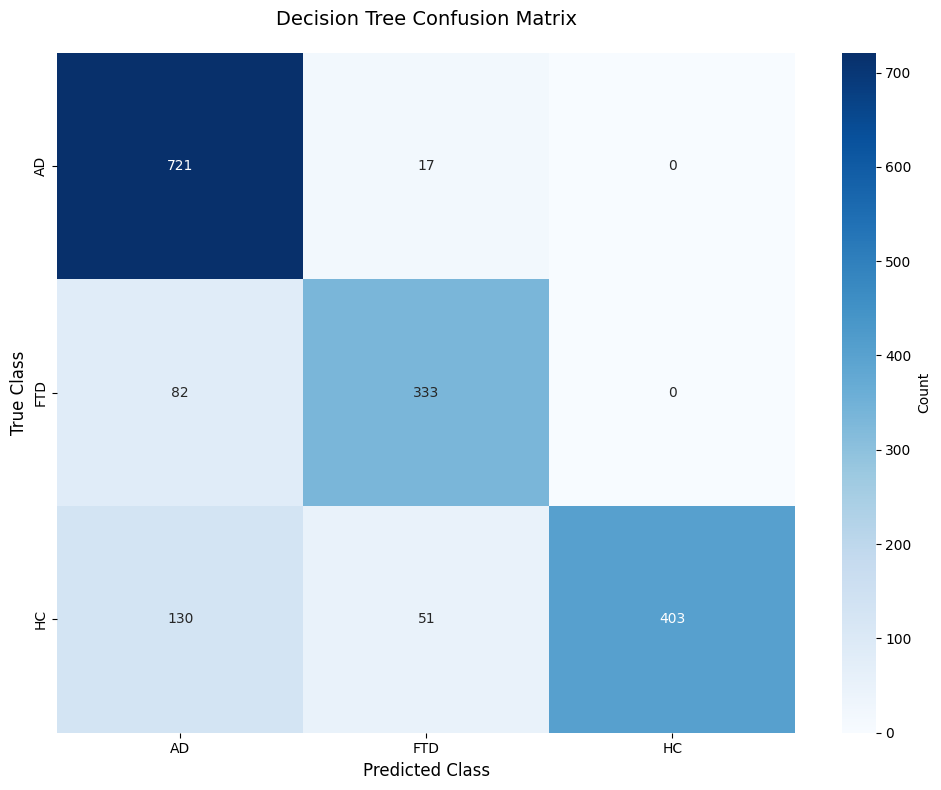


📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.77      0.98      0.86       738
         FTD       0.83      0.80      0.82       415
          HC       1.00      0.69      0.82       584

    accuracy                           0.84      1737
   macro avg       0.87      0.82      0.83      1737
weighted avg       0.86      0.84      0.84      1737


📈 Per-class Accuracy:
  AD: 97.70%
  FTD: 80.24%
  HC: 69.01%

🔁 Pairwise Classifiers Trained (Decision Tree):
  AD vs FTD
  AD vs HC
  FTD vs HC

🕒 Total Testing Time: 1.9981 seconds
⏱️ Average Testing Time per Sample: 1.15 ms


In [26]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import time  # For measuring testing time

# Define class names
class_names = ['AD', 'FTD', 'HC']  # Corresponding to classes 0, 1, 2

# CSP and classifier setup for pairwise approach
pairwise_csp_models = {}
pairwise_classifiers = {}
pairs = []
n_classes = 3

# Generate all pairwise combinations of classes
for pair in combinations(range(n_classes), 2):
    pairs.append(pair)
    class1, class2 = pair

    # Filter the data for the two classes
    idx = np.logical_or(y_train == class1, y_train == class2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair = (y_pair == class1).astype(int)  # Binary labels: class1=1, class2=0

    # Fit CSP and classifier
    csp = CSP(n_components=6, reg=None, log=True, cov_est='concat')
    csp.fit(X_pair, y_pair)
    X_pair_csp = csp.transform(X_pair)

    classifier_dt = DecisionTreeClassifier(random_state=42)
    classifier_dt.fit(X_pair_csp, y_pair)

    # Save models
    pairwise_csp_models[pair] = csp
    pairwise_classifiers[pair] = classifier_dt

# Start testing time
start_time = time.time()

# Predict for test data
y_pred = np.zeros((len(X_test), n_classes))

for pair in pairs:
    class1, class2 = pair

    # Filter test data for this pair
    idx = np.logical_or(y_test == class1, y_test == class2)
    X_pair_test = X_test[idx]

    # Apply CSP and predict probabilities
    csp = pairwise_csp_models[pair]
    classifier_dt = pairwise_classifiers[pair]

    X_pair_csp = csp.transform(X_pair_test)
    prob = classifier_dt.predict_proba(X_pair_csp)

    # Assign probabilities to the respective classes
    y_pred[idx, class1] += prob[:, 1]  # Class1 probabilities
    y_pred[idx, class2] += prob[:, 0]  # Class2 probabilities

# End testing time
end_time = time.time()
total_test_time = end_time - start_time
avg_test_time_per_sample = total_test_time / len(X_test)

# Final predictions
final_pred = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"\n✅ Multi-Class CSP Accuracy (Decision Tree): {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title("Decision Tree Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, final_pred, target_names=class_names))

# Per-class accuracy
print("\n📈 Per-class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_acc = accuracy_score(y_test[class_mask], final_pred[class_mask])
        print(f"  {class_name}: {class_acc * 100:.2f}%")

# Pairwise classifier info
print(f"\n🔁 Pairwise Classifiers Trained (Decision Tree):")
for pair in pairs:
    class1, class2 = pair
    print(f"  {class_names[class1]} vs {class_names[class2]}")

# Inference time
print(f"\n🕒 Total Testing Time: {total_test_time:.4f} seconds")
print(f"⏱️ Average Testing Time per Sample: {avg_test_time_per_sample * 1000:.2f} ms")


## XGBooster apply

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 19 dim * 1.4e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00056 (2.2e-16 eps * 19 dim * 1.3e+11  max singular value)
    Estimated rank (data): 19
    data: rank 19 computed from 19 data channels with 0 projectors
Reducing data rank from 19 -> 19
Estimating class=0 covariance using EMPI

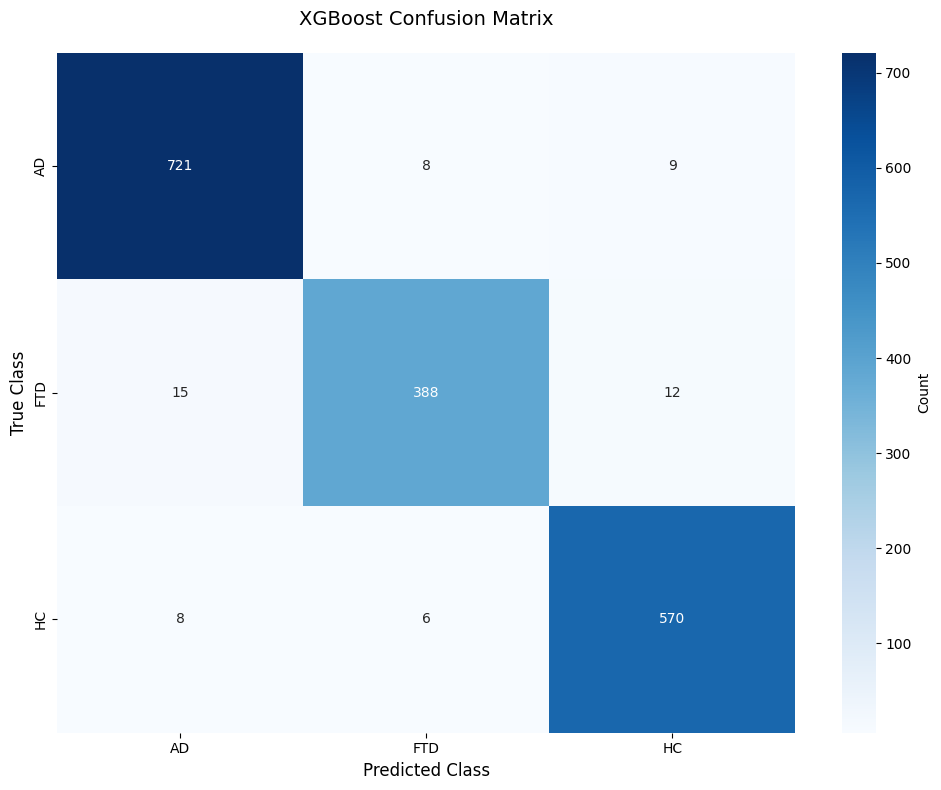


📊 Classification Report:
              precision    recall  f1-score   support

          AD       0.97      0.98      0.97       738
         FTD       0.97      0.93      0.95       415
          HC       0.96      0.98      0.97       584

    accuracy                           0.97      1737
   macro avg       0.97      0.96      0.96      1737
weighted avg       0.97      0.97      0.97      1737


📈 Per-class Accuracy:
  AD: 97.70%
  FTD: 93.49%
  HC: 97.60%

🔁 Pairwise Classifiers Trained (XGBoost):
  AD vs FTD
  AD vs HC
  FTD vs HC

🕒 Total Testing Time: 1.9982 seconds
⏱️ Average Testing Time per Sample: 1.15 ms


In [27]:
import numpy as np
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import time  # For measuring testing time

# Define class names
class_names = ['AD', 'FTD', 'HC']  # Corresponding to classes 0, 1, 2

# CSP and classifier setup for pairwise approach
pairwise_csp_models = {}
pairwise_classifiers = {}
pairs = []
n_classes = 3

# Generate all pairwise combinations of classes
for pair in combinations(range(n_classes), 2):
    pairs.append(pair)
    class1, class2 = pair

    # Filter the data for the two classes
    idx = np.logical_or(y_train == class1, y_train == class2)
    X_pair = X_train[idx]
    y_pair = y_train[idx]
    y_pair = (y_pair == class1).astype(int)  # Binary labels: class1=1, class2=0

    # Fit CSP and classifier
    csp = CSP(n_components=6, reg=None, log=True, cov_est='concat')
    csp.fit(X_pair, y_pair)
    X_pair_csp = csp.transform(X_pair)

    classifier_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    classifier_xgb.fit(X_pair_csp, y_pair)

    # Save models
    pairwise_csp_models[pair] = csp
    pairwise_classifiers[pair] = classifier_xgb

# Start testing time
start_time = time.time()

# Predict for test data
y_pred = np.zeros((len(X_test), n_classes))

for pair in pairs:
    class1, class2 = pair

    # Filter test data for this pair
    idx = np.logical_or(y_test == class1, y_test == class2)
    X_pair_test = X_test[idx]

    # Apply CSP and predict probabilities
    csp = pairwise_csp_models[pair]
    classifier_xgb = pairwise_classifiers[pair]

    X_pair_csp = csp.transform(X_pair_test)
    prob = classifier_xgb.predict_proba(X_pair_csp)

    # Assign probabilities to the respective classes
    y_pred[idx, class1] += prob[:, 1]  # Class1 probabilities
    y_pred[idx, class2] += prob[:, 0]  # Class2 probabilities

# End testing time
end_time = time.time()
total_test_time = end_time - start_time
avg_test_time_per_sample = total_test_time / len(X_test)

# Final predictions
final_pred = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, final_pred)
print(f"\n✅ Multi-Class CSP Accuracy (XGBoost): {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title("XGBoost Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, final_pred, target_names=class_names))

# Per-class accuracy
print("\n📈 Per-class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = (y_test == i)
    if np.sum(class_mask) > 0:
        class_acc = accuracy_score(y_test[class_mask], final_pred[class_mask])
        print(f"  {class_name}: {class_acc * 100:.2f}%")

# Pairwise classifier info
print(f"\n🔁 Pairwise Classifiers Trained (XGBoost):")
for pair in pairs:
    class1, class2 = pair
    print(f"  {class_names[class1]} vs {class_names[class2]}")

# Inference time
print(f"\n🕒 Total Testing Time: {total_test_time:.4f} seconds")
print(f"⏱️ Average Testing Time per Sample: {avg_test_time_per_sample * 1000:.2f} ms")


## Explainable AI (XAI)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import CSP
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from mne import pick_types
from mne.viz import plot_topomap
from mne.channels import make_standard_montage

class ExplainableBCI:
    def __init__(self, pairwise_csp_models, pairwise_classifiers, class_names):
        self.pairwise_csp_models = pairwise_csp_models
        self.pairwise_classifiers = pairwise_classifiers
        self.class_names = class_names
        self.pairs = list(pairwise_csp_models.keys())
    
    def explain_csp_patterns(self, info, pair_idx=0):
        """
        Visualize CSP spatial patterns (topomaps)
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        class1, class2 = pair
        
        # Get CSP patterns (spatial filters)
        patterns = csp_model.patterns_
        filters = csp_model.filters_
        
        # Create figure for patterns
        n_components = patterns.shape[0]
        
        # Dynamic subplot arrangement based on number of components
        if n_components <= 2:
            fig, axes = plt.subplots(1, n_components, figsize=(5*n_components, 4))
            if n_components == 1:
                axes = [axes]  # Make it iterable
        elif n_components <= 4:
            fig, axes = plt.subplots(2, 2, figsize=(10, 8))
            axes = axes.flatten()
        elif n_components <= 6:
            fig, axes = plt.subplots(2, 3, figsize=(15, 8))
            axes = axes.flatten()
        elif n_components <= 8:
            fig, axes = plt.subplots(2, 4, figsize=(20, 8))
            axes = axes.flatten()
        else:
            # For more than 8 components, create a grid that accommodates all
            n_cols = min(4, n_components)
            n_rows = int(np.ceil(n_components / n_cols))
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
            axes = axes.flatten() if n_components > 1 else [axes]
        
        fig.suptitle(f'CSP Spatial Patterns: {self.class_names[class1]} vs {self.class_names[class2]}', 
                     fontsize=14)
        
        # Plot topomaps for each CSP component
        for i in range(n_components):
            ax = axes[i]
            
            # Plot topomap
            im = plot_topomap(patterns[i], info, axes=ax, show=False, 
                             contours=6, cmap='RdBu_r')
            ax.set_title(f'CSP Component {i+1}')
        
        # Hide unused subplots if any
        for j in range(n_components, len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        return patterns, filters
    
    def feature_importance_analysis(self, X_test, y_test, pair_idx=0):
        """
        Analyze feature importance using permutation importance
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        classifier = self.pairwise_classifiers[pair]
        class1, class2 = pair
        
        # Filter test data for this pair
        idx = np.logical_or(y_test == class1, y_test == class2)
        X_pair_test = X_test[idx]
        y_pair_test = y_test[idx]
        y_pair_test = (y_pair_test == class1).astype(int)
        
        # Check if we have data for both classes
        if len(np.unique(y_pair_test)) < 2:
            print(f"Warning: Only one class found in test data for pair {self.class_names[class1]} vs {self.class_names[class2]}")
            return None
        
        # Transform data
        X_csp = csp_model.transform(X_pair_test)
        
        # Calculate permutation importance
        perm_importance = permutation_importance(
            classifier, X_csp, y_pair_test, 
            n_repeats=10, random_state=42, scoring='accuracy'
        )
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        feature_names = [f'CSP Component {i+1}' for i in range(X_csp.shape[1])]
        
        # Sort features by importance
        sorted_idx = perm_importance.importances_mean.argsort()[::-1]
        
        plt.bar(range(len(sorted_idx)), 
                perm_importance.importances_mean[sorted_idx])
        plt.xticks(range(len(sorted_idx)), 
                  [feature_names[i] for i in sorted_idx])
        plt.title(f'Feature Importance: {self.class_names[class1]} vs {self.class_names[class2]}')
        plt.xlabel('CSP Components')
        plt.ylabel('Permutation Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return perm_importance
    
    def shap_analysis(self, X_test, y_test, pair_idx=0, sample_size=100):
        """
        SHAP analysis for model interpretability
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        classifier = self.pairwise_classifiers[pair]
        class1, class2 = pair
        
        # Filter and transform data
        idx = np.logical_or(y_test == class1, y_test == class2)
        X_pair_test = X_test[idx]
        y_pair_test = y_test[idx]
        
        # Check if we have data for both classes
        if len(np.unique(y_pair_test)) < 2:
            print(f"Warning: Only one class found in test data for pair {self.class_names[class1]} vs {self.class_names[class2]}")
            return None, None
        
        X_csp = csp_model.transform(X_pair_test)
        
        # Limit sample size for SHAP (computational efficiency)
        if len(X_csp) > sample_size:
            sample_idx = np.random.choice(len(X_csp), sample_size, replace=False)
            X_csp_sample = X_csp[sample_idx]
        else:
            X_csp_sample = X_csp
        
        try:
            # Create SHAP explainer
            explainer = shap.TreeExplainer(classifier)
            shap_values = explainer.shap_values(X_csp_sample)
            
            # If binary classification, get SHAP values for positive class
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # Positive class
            
            # SHAP summary plot
            feature_names = [f'CSP_{i+1}' for i in range(X_csp_sample.shape[1])]
            
            plt.figure(figsize=(10, 6))
            shap.summary_plot(shap_values, X_csp_sample, 
                             feature_names=feature_names, show=False)
            plt.title(f'SHAP Feature Importance: {self.class_names[class1]} vs {self.class_names[class2]}')
            plt.tight_layout()
            plt.show()
            
            return shap_values, explainer
            
        except Exception as e:
            print(f"Error in SHAP analysis: {e}")
            return None, None
    
    def explain_single_prediction(self, X_sample, info, pair_idx=0):
        """
        Explain a single prediction with spatial and feature-level interpretability
        """
        pair = self.pairs[pair_idx]
        csp_model = self.pairwise_csp_models[pair]
        classifier = self.pairwise_classifiers[pair]
        class1, class2 = pair
        
        # Transform single sample
        X_csp = csp_model.transform(X_sample.reshape(1, -1, -1))
        
        # Get prediction and probability
        prediction = classifier.predict(X_csp)[0]
        probability = classifier.predict_proba(X_csp)[0]
        
        # Feature contributions (simplified)
        feature_values = X_csp[0]
        
        print(f"Prediction Analysis: {self.class_names[class1]} vs {self.class_names[class2]}")
        print(f"Predicted Class: {self.class_names[class1] if prediction == 1 else self.class_names[class2]}")
        print(f"Confidence: {max(probability):.3f}")
        print(f"Probabilities: {self.class_names[class1]}={probability[1]:.3f}, {self.class_names[class2]}={probability[0]:.3f}")
        
        # Plot CSP feature contributions
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.bar(range(len(feature_values)), feature_values)
        plt.title('CSP Feature Values')
        plt.xlabel('CSP Component')
        plt.ylabel('Feature Value')
        plt.xticks(range(len(feature_values)), [f'CSP_{i+1}' for i in range(len(feature_values))])
        
        plt.subplot(1, 2, 2)
        plt.bar([self.class_names[class2], self.class_names[class1]], probability)
        plt.title('Class Probabilities')
        plt.ylabel('Probability')
        plt.ylim(0, 1)
        
        plt.tight_layout()
        plt.show()
        
        return prediction, probability, feature_values
    
    def generate_explanation_report(self, X_test, y_test, info):
        """
        Generate comprehensive explanation report
        """
        print("=" * 60)
        print("EXPLAINABLE AI ANALYSIS REPORT")
        print("=" * 60)
        
        for i, pair in enumerate(self.pairs):
            class1, class2 = pair
            print(f"\n{i+1}. PAIRWISE ANALYSIS: {self.class_names[class1]} vs {self.class_names[class2]}")
            print("-" * 50)
            
            # Check if we have test data for this pair
            idx = np.logical_or(y_test == class1, y_test == class2)
            if not np.any(idx):
                print(f"   ⚠️  No test data available for this pair")
                continue
            
            # CSP patterns explanation
            print("🧠 CSP Spatial Patterns:")
            print("   - Shows brain regions most discriminative between classes")
            print("   - Red areas: Higher activity for one class")
            print("   - Blue areas: Higher activity for other class")
            
            # Feature importance
            print("\n📊 Feature Importance:")
            importance = self.feature_importance_analysis(X_test, y_test, i)
            if importance is not None:
                top_feature = np.argmax(importance.importances_mean)
                print(f"   - Most important: CSP Component {top_feature + 1}")
                print(f"   - Importance score: {importance.importances_mean[top_feature]:.4f}")
            else:
                print("   - Could not calculate feature importance")
            
            print("\n" + "="*60)

# Usage example
def apply_explainable_ai(pairwise_csp_models, pairwise_classifiers, X_test, y_test, info):
    """
    Main function to apply explainable AI techniques
    """
    class_names = ['AD', 'FTD', 'HC']
    
    # Initialize explainable BCI
    xai_bci = ExplainableBCI(pairwise_csp_models, pairwise_classifiers, class_names)
    
    # Generate comprehensive explanation
    xai_bci.generate_explanation_report(X_test, y_test, info)
    
    # Check if we have pairs to analyze
    if len(xai_bci.pairs) == 0:
        print("No pairwise models found!")
        return xai_bci
    
    # Detailed analysis for first pair
    first_pair = xai_bci.pairs[0]
    class1, class2 = first_pair
    print(f"\nDetailed Analysis for {xai_bci.class_names[class1]} vs {xai_bci.class_names[class2]}:")
    
    try:
        patterns, filters = xai_bci.explain_csp_patterns(info, pair_idx=0)
        importance = xai_bci.feature_importance_analysis(X_test, y_test, pair_idx=0)
        
        # SHAP analysis (if shap is available)
        try:
            shap_values, explainer = xai_bci.shap_analysis(X_test, y_test, pair_idx=0)
            if shap_values is not None:
                print("✅ SHAP analysis completed")
            else:
                print("⚠️  SHAP analysis failed")
        except ImportError:
            print("⚠️  SHAP not available. Install with: pip install shap")
        except Exception as e:
            print(f"⚠️  SHAP analysis error: {e}")
            
    except Exception as e:
        print(f"Error in detailed analysis: {e}")
    
    return xai_bci

EXPLAINABLE AI ANALYSIS REPORT

1. PAIRWISE ANALYSIS: AD vs FTD
--------------------------------------------------
🧠 CSP Spatial Patterns:
   - Shows brain regions most discriminative between classes
   - Red areas: Higher activity for one class
   - Blue areas: Higher activity for other class

📊 Feature Importance:


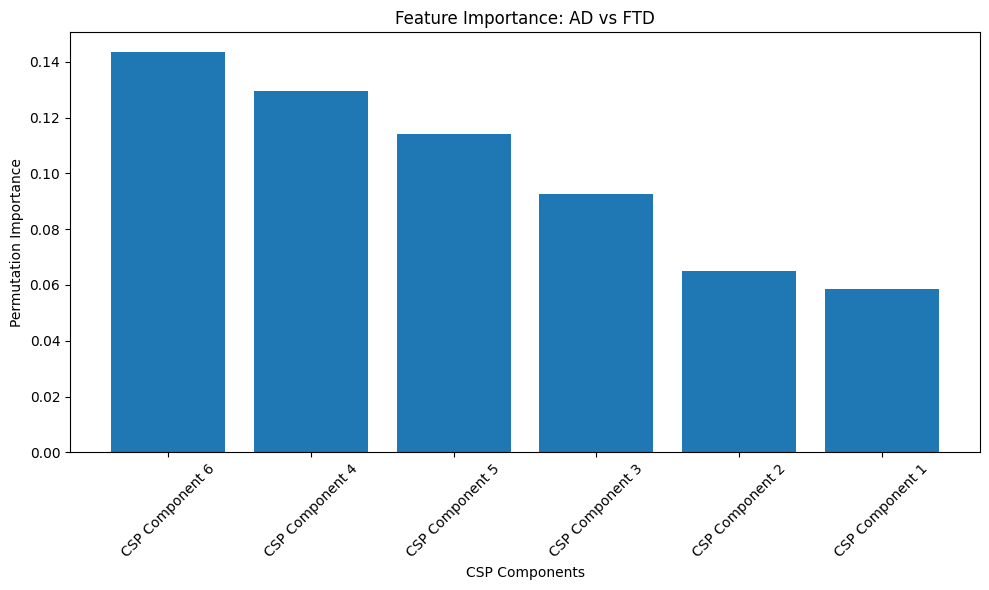

   - Most important: CSP Component 6
   - Importance score: 0.1434


2. PAIRWISE ANALYSIS: AD vs HC
--------------------------------------------------
🧠 CSP Spatial Patterns:
   - Shows brain regions most discriminative between classes
   - Red areas: Higher activity for one class
   - Blue areas: Higher activity for other class

📊 Feature Importance:


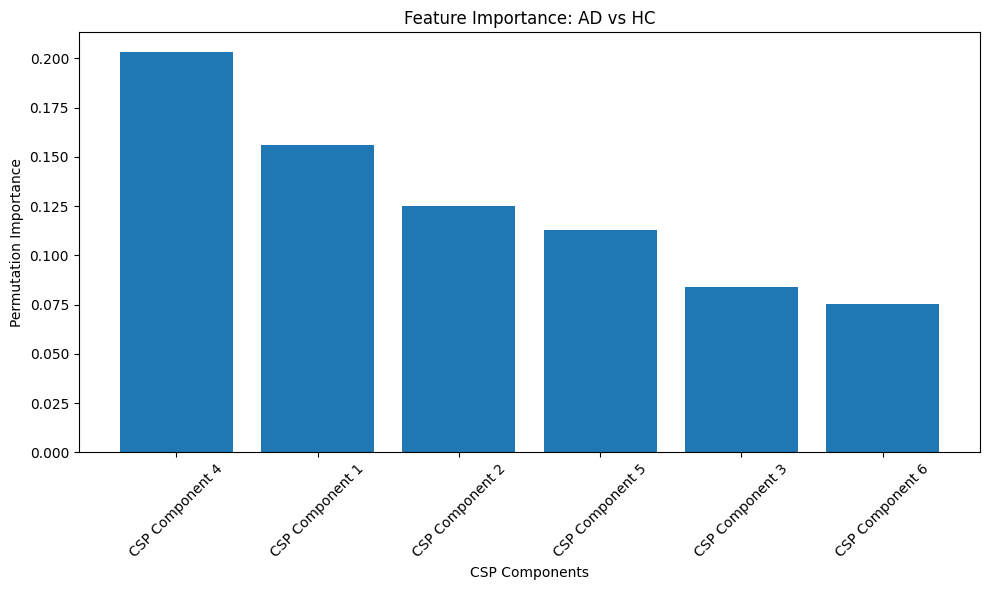

   - Most important: CSP Component 4
   - Importance score: 0.2030


3. PAIRWISE ANALYSIS: FTD vs HC
--------------------------------------------------
🧠 CSP Spatial Patterns:
   - Shows brain regions most discriminative between classes
   - Red areas: Higher activity for one class
   - Blue areas: Higher activity for other class

📊 Feature Importance:


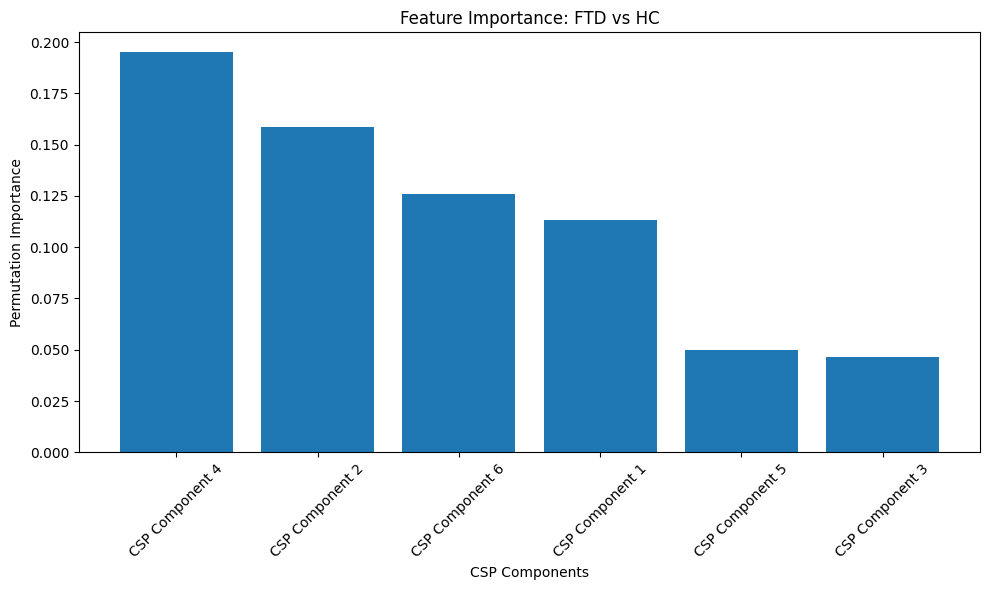

   - Most important: CSP Component 4
   - Importance score: 0.1950


Detailed Analysis for AD vs FTD:


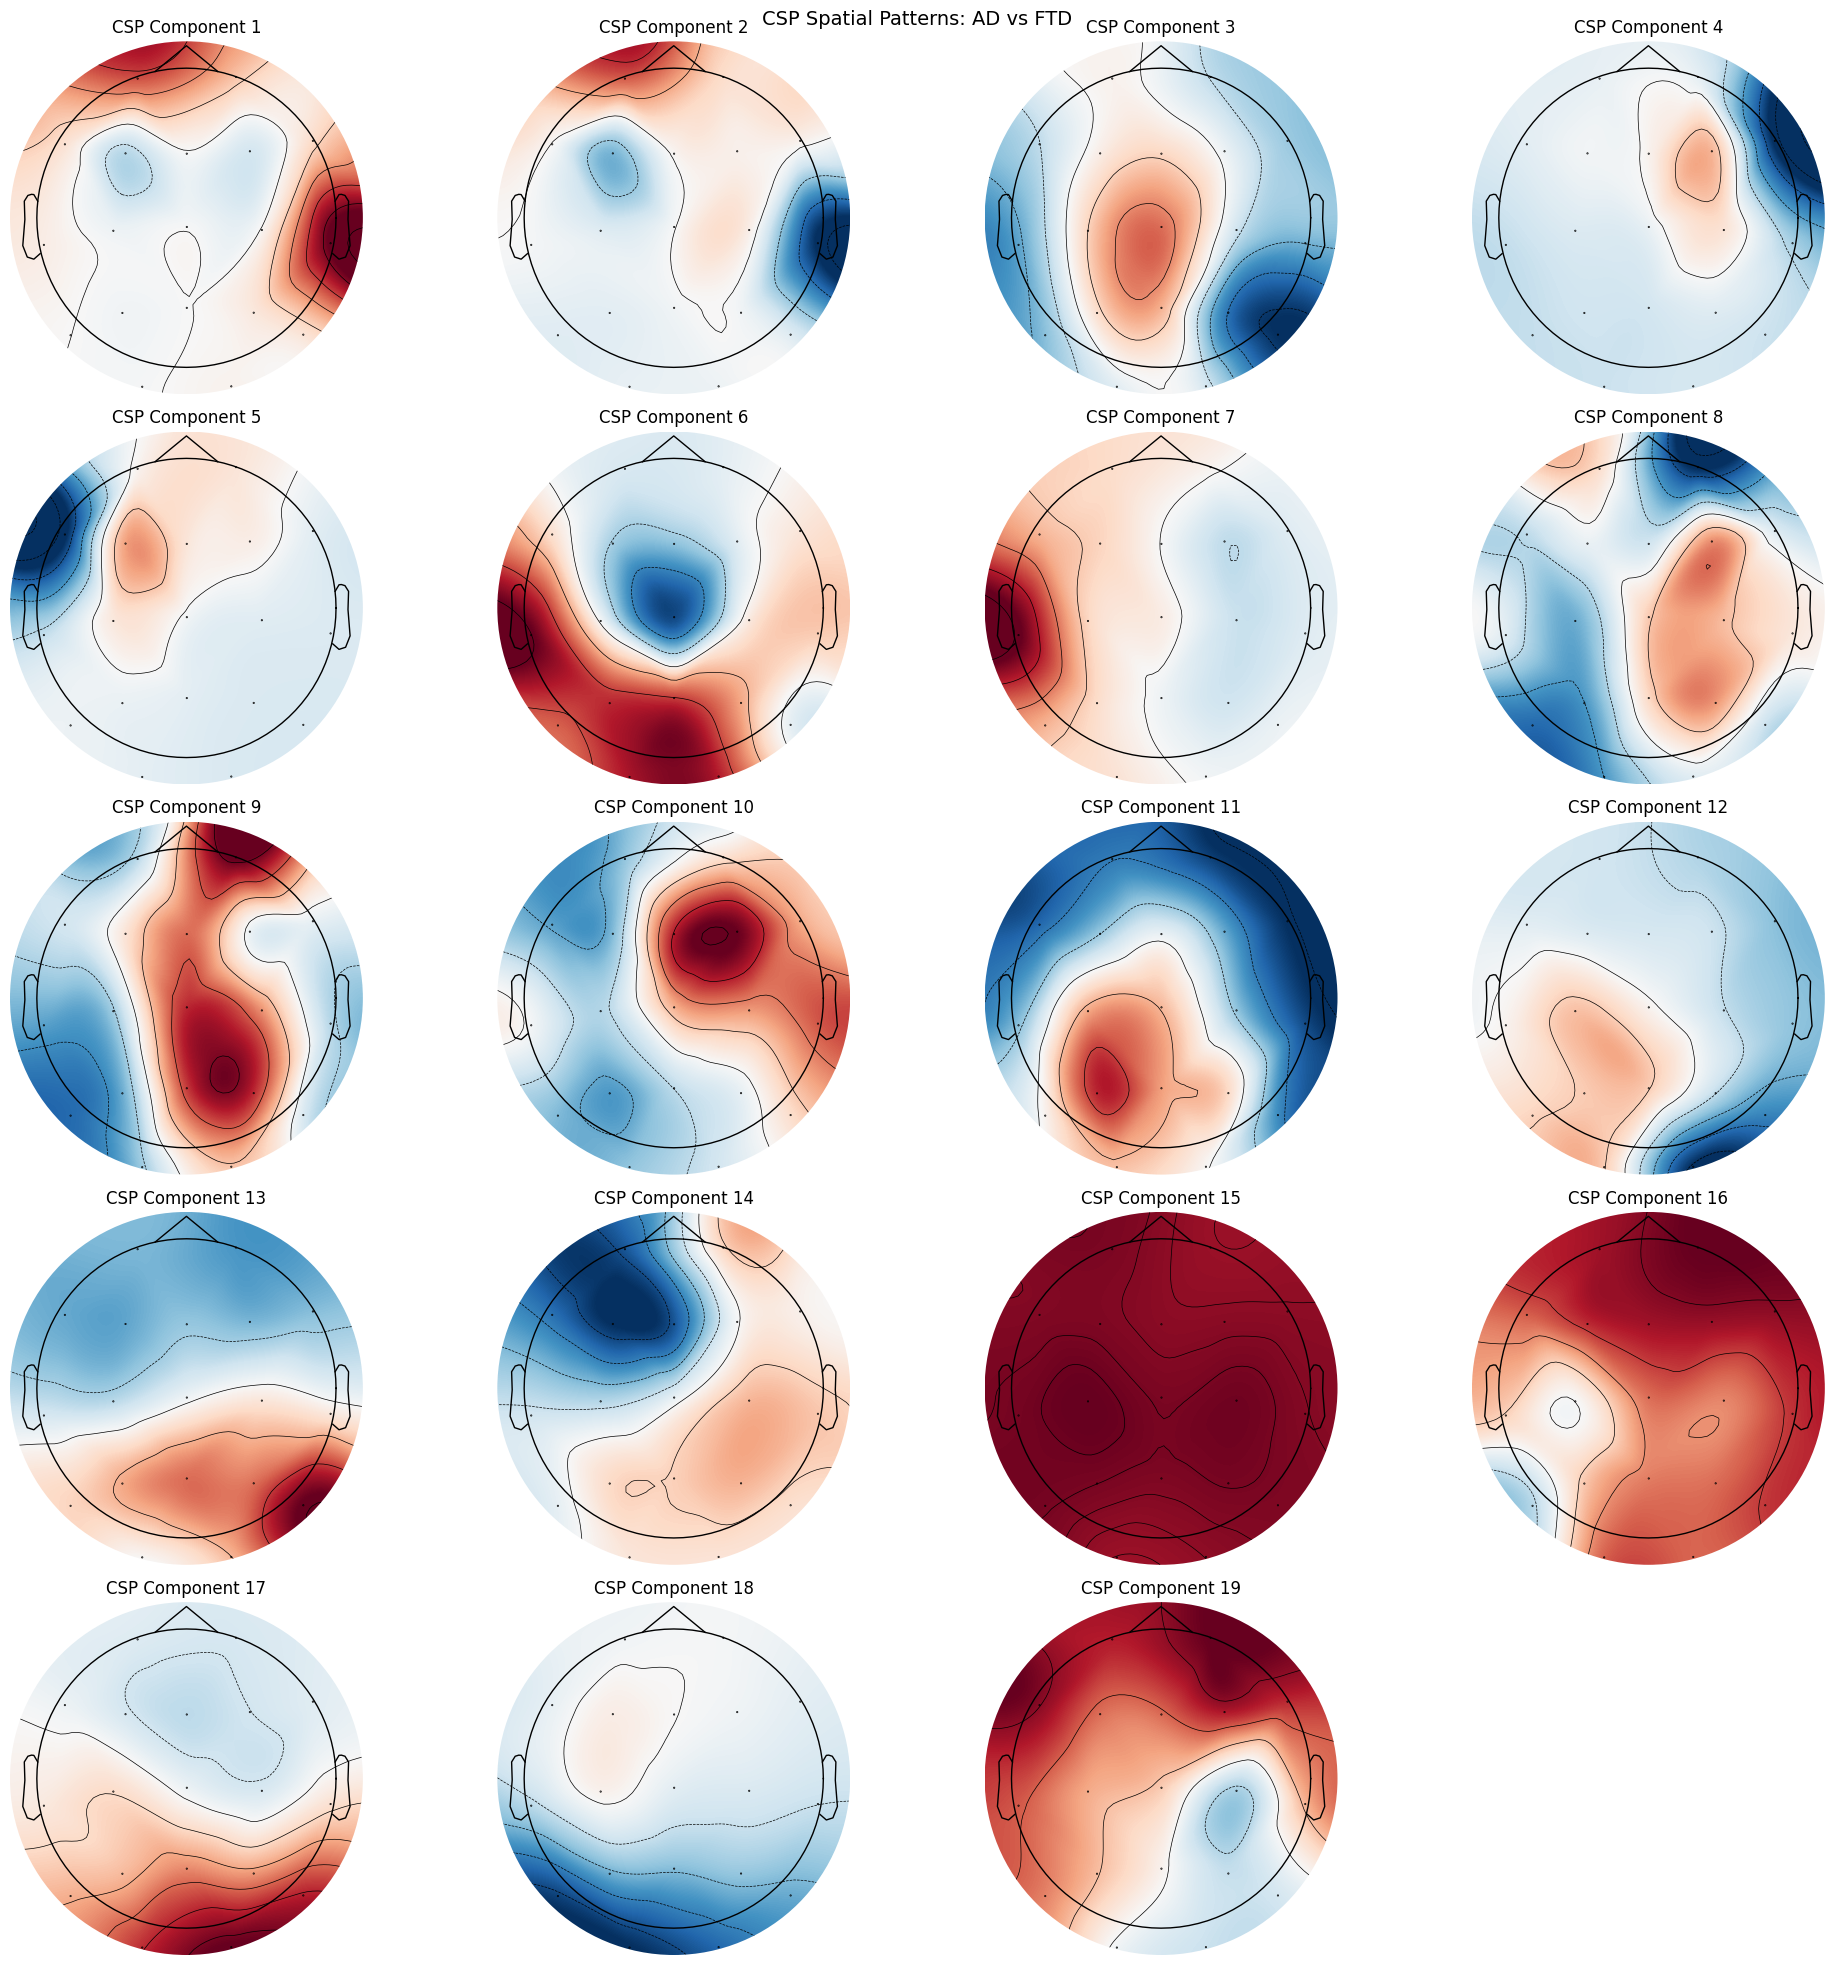

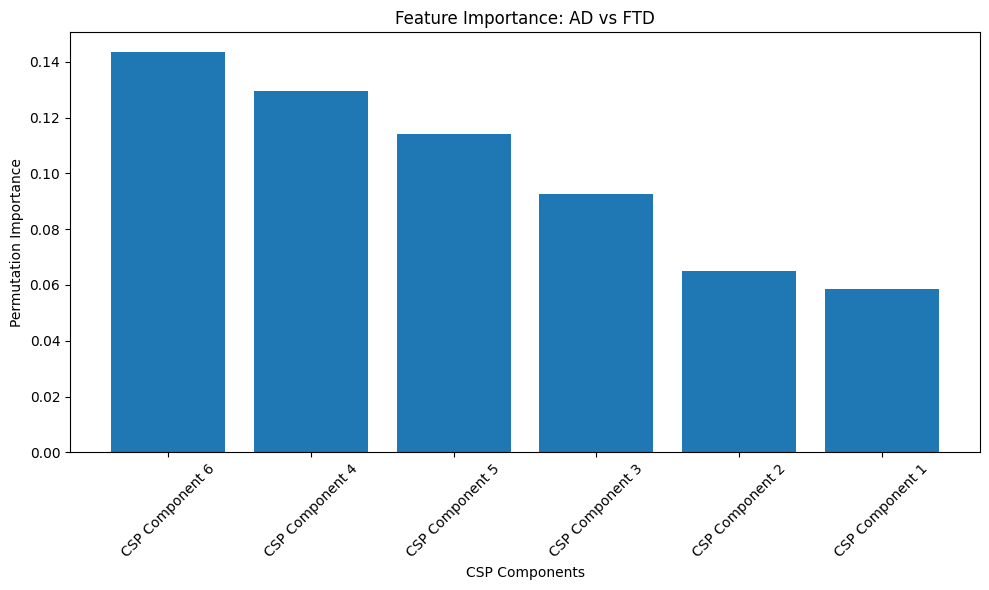

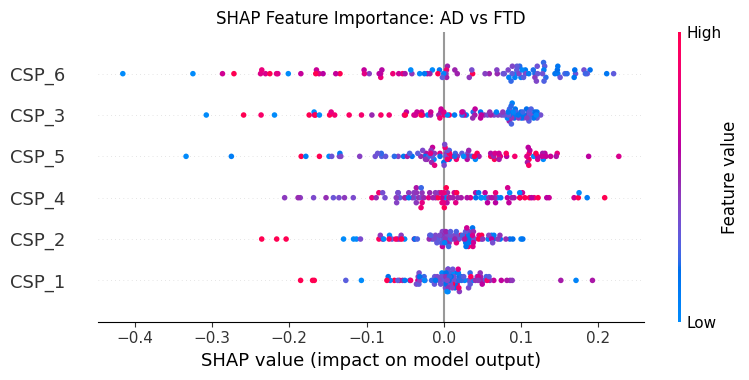

✅ SHAP analysis completed


In [23]:
# Example usage:
xai_bci = apply_explainable_ai(pairwise_csp_models, pairwise_classifiers, X_test, y_test, info)